# Описание проекта: Проверка гипотез и анализ данных о продаже компьютерных игр интернет-магазином «Стримчик». Данные о продажах игр предоставлены до 2016 года, нужно спрогнозировать продажы на 2017 год. Есть данные о продажах в саммых популярных регионов,таких как Северная Америка, Европа и Япония, весь остальной мир представлен под артикулом Other. Нужно будет определить самые популярные платформы и жанры в каждом из регионов

# Шаг 1. Импортирование библиотек 

In [2]:
#импортирую все библиотеки, которыми буду пользоваться 
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

# Шаг 2. Загрузка данных

In [4]:
#загружаю датасет
try:
    data = pd.read_csv('/Users/kostyatrufanov/Downloads/games.csv')
except:
    data = pd.read_csv('/datasets/games.csv')

# Шаг 3. Подготовка данных к анализу

## Шаг 3.1. Изменяю названия столбцов

In [9]:
#вывожу первые пять строк, чтобы понять название каких столбцов надо поменять
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [11]:
#сохраняю список из названий всех столбцов в переменную columns
columns = data.columns
#деляю из списка строку, чтобы легче было поменять регистр
columns = ';'.join(columns).lower()
#обратно деляю из строки список 
columns = columns.split(';')
#меняю навзания
data.columns = columns
#проверяю, что все хорошо
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Шаг 3.2. Преобразование данных в нужные типы

In [14]:
#вывожу общую информацию о всех столбцах
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [16]:
#меняю тип данных на integer
data['year_of_release'] = data['year_of_release'].astype('Int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(5), object(5)
memory usage: 1.4+ MB


In [18]:
#меняю тип данных на integer
data['critic_score'] = data['critic_score'].astype('Int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: Int64(2), float64(4), object(5)
memory usage: 1.4+ MB


## Шаг 3.3. Обработка пропусков

In [21]:
# создаю цикл, который ищет пропуски в датафрейме
all_columns = []
all_columns.extend(data.columns)
for i in all_columns:
    if (data[i].isna().sum() > 0):
         display(f'В столбце {i} пропуски есть')
    else:
        display(f'В столбце {i} пропусков нет')

'В столбце name пропуски есть'

'В столбце platform пропусков нет'

'В столбце year_of_release пропуски есть'

'В столбце genre пропуски есть'

'В столбце na_sales пропусков нет'

'В столбце eu_sales пропусков нет'

'В столбце jp_sales пропусков нет'

'В столбце other_sales пропусков нет'

'В столбце critic_score пропуски есть'

'В столбце user_score пропуски есть'

'В столбце rating пропуски есть'

In [23]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,<NA>,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,<NA>,NaN,NaN


In [25]:
# пропуски в таблице name я удалил, потому что всего было два пропуска и они бы сильно не повлияли на исследование
data = data[data['name'].isna()==False]
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,NaN,NaN


**Пропуски в столбце year_of_release я оставил, потому что нельзя заменить каким-то средним числом. Скорее всего это пропуски появились из-за ошибок при заполнение или из-за того, что нельзя точно понять когда вышла игра.**

**Пропуски в столбце genre удалились вместе с пропусками в столбце name.**

**Пропуски в столбце critic_score я оставил, потому что каждая игра разная и нельзя пропуски заменить каким-то средним значением. Скорее всего пропуски появились из-зи того, что игра старая и тогда еще не было критиков, которые оценивали игры. Либо еще нет оценки из-за того, что игра не известная**

**Пропуски в столбце user_score я оставил, потому что каждая игра разная и нельзя пропуски заменить каким-то средним значениям.
Скорее всего пропуски появились из-зи того, что игра старая и тогда еще не было критиков, которые оценивали игры. Либо еще нет оценки из-за того, что игра не известная**

**Пропуски в столбце rating я оставил, потому что у каждой игра свой возрастной рейтинг и его нельзя заменить каким-то средним числом. Скорее всего пропуски появились из-за возраста или нрепопулярности игры.**

**TBD расшифровывается как To Be Determined (будет определено) или To Be Decided (будет решено). Это означает, что игра допустим скоро выходит и вскором времени будет определена оценка.**

In [33]:
#смотрю какие вообще значения существуют в столбе user_score
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [35]:
#меняю все значения tbd на нули
data.loc[data['user_score']=='tbd', 'user_score'] = 0
#проверяю, что все получилось
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 0, '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [37]:
#поменял все пропуски на нули, чтобы они не отличались от tbd
data['user_score'] = data['user_score'].fillna(0)

## Шаг 3.4. Создание отдельного столбца

In [40]:
# создаю отдельный столбец и присваиваю значение 0 для каждой строки 
data['all_sales'] = 0
# меняю нули на общую сумму продаж для каждой строки
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,<NA>,0,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,<NA>,0,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,<NA>,0,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,<NA>,0,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,<NA>,0,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,<NA>,0,NaN,0.01


### Шаг 3.4. Вывод: добавил новый столбец с общим количесвто продаж, который очень поможет в будущем исследование

In [43]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   Int64  
 9   user_score       16713 non-null  object 
 10  rating           9949 non-null   object 
 11  all_sales        16713 non-null  float64
dtypes: Int64(2), float64(5), object(5)
memory usage: 1.7+ MB


## Шаг 3.5. Проверка на наличие простых дубликатов

In [46]:
#проверяю на наличие простых дубликатов
data.duplicated().sum()

0

In [48]:
#проверяю на наличие дубликатов по трем основны столбам
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

In [50]:
#удаля дубликаты по трем основным столбам и оставляю первую запись
data['name', 'platform', 'year_of_release'] = data.drop_duplicates(subset=['name', 'platform', 'year_of_release'], 
                                                                   keep='first', inplace=True)

In [52]:
#проверяю, что все получилось
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

0

### Шаг 3.5. Вывод: простых дубликатов нет в датафрейме. Дубликаты по трем основным столбцам удалены.

## Шаг 3. Вывооды: Была проведена подготовка всех данных к анализу. Поменял тип данных у некоторых столбов. Заменил пропуски на нули или оставил из-за безысходности. Удалил все дубликаты. Вообщем данные готовы к анализу

# Шаг 4.  Проведение исследовательского анализа данных

## Шаг 4.1.  Количество вышедших игр за каждый год

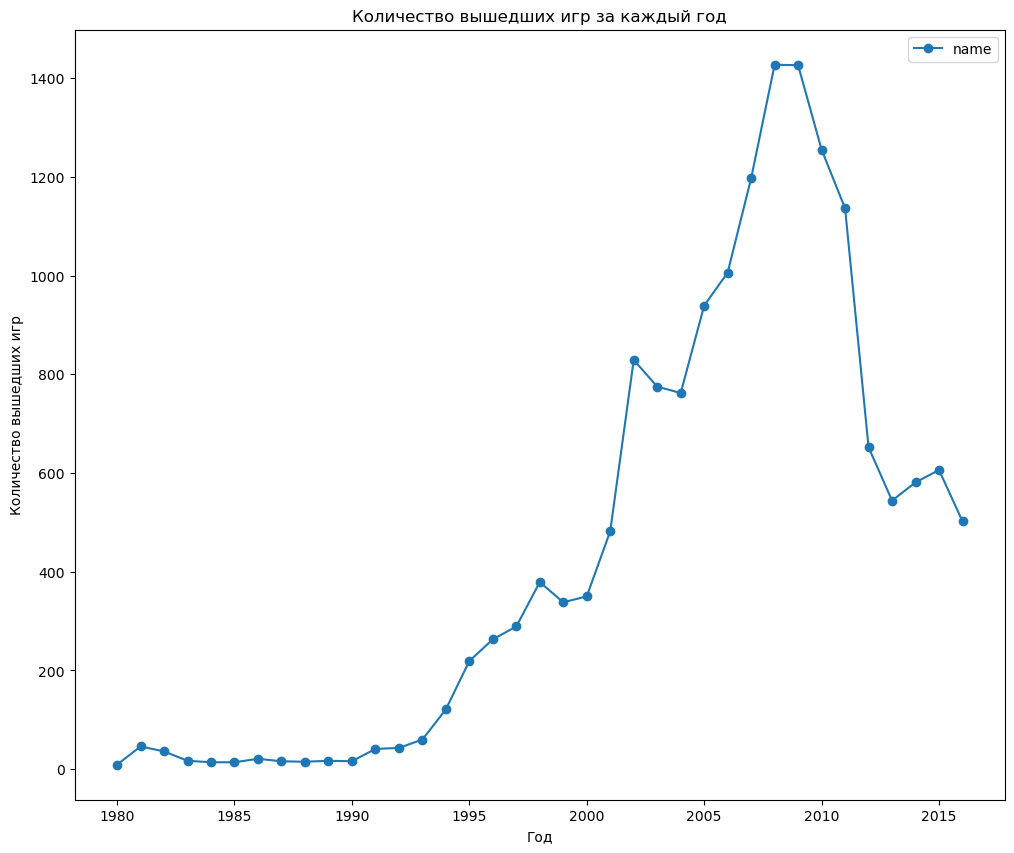

In [58]:
#создаю отдельную таблицу, в которой хранится информация о том, сколько игр выходило каждый год 
count_games = data.pivot_table(index='year_of_release', values='name', aggfunc='count')
#строю линейный график, где каждое значение обозначено точкой
count_games.plot(figsize=(12,10), style='o-');
plt.xlabel('Год')
plt.ylabel('Количество вышедших игр')
plt.title('Количество вышедших игр за каждый год')
plt.show()

### Вывод: Больше всего игр создавалось в промежуток с 2005 года по 2012 год.

## Шаг 4.2. Изменение продаж по платформам

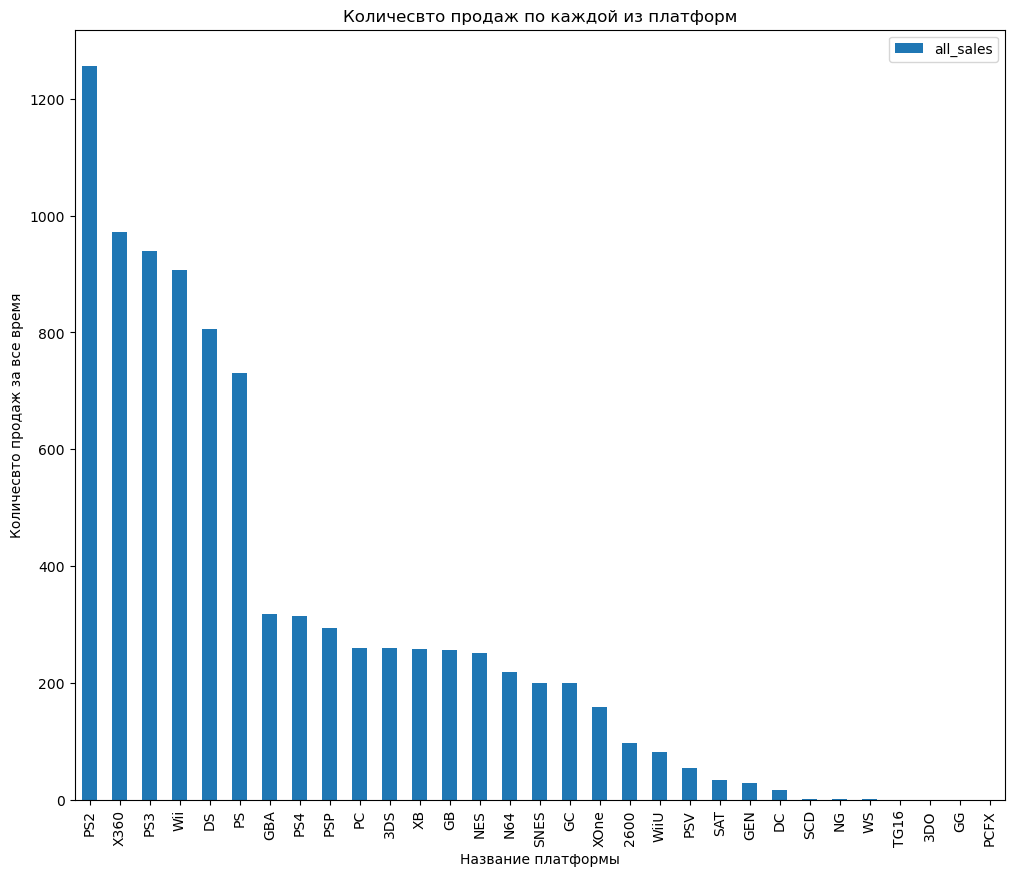

In [62]:
#создаю таблицу, где будут данные о всех продажах по каждой из платформ
platforms = data.pivot_table(index='platform',  values='all_sales', aggfunc='sum')
#сортирую по убыванию и добавляю нумерацию
platforms = platforms.sort_values(by='all_sales', ascending=False).reset_index()
#строю линейный график
platforms.plot(x='platform', y='all_sales', kind='bar', figsize=(12, 10));
plt.xlabel('Название платформы')
plt.ylabel('Количесвто продаж за все время')
plt.title('Количесвто продаж по каждой из платформ');

In [64]:
#оставил топ 6 самых популярных платформ
platforms_top6 = platforms.loc[0:5]
platforms_top6

,platform,all_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.64
3,Wii,907.51
4,DS,806.12
5,PS,730.86


In [104]:
#создаю отдельную таблицу, где только платформы входящие в топ 6 
new_data = data[data['platform'].isin(list(platforms_top6['platform']))]
#создаю еще одну таблицу, где информация только о продажах за каждый год по каждой из платформ лидеров
data_1 = new_data.pivot_table(index=['platform', 'year_of_release'], values='all_sales', aggfunc='sum').reset_index()
data_1

,platform,year_of_release,all_sales
0,DS,1985,0.02
1,DS,2004,17.27
2,DS,2005,130.14
3,DS,2006,119.81
4,DS,2007,146.94
...,...,...,...
62,X360,2012,99.74
63,X360,2013,88.58
64,X360,2014,34.74
65,X360,2015,11.96


In [106]:
#для каждой из платформ создаю отдельную таблицу
data_PS2 = data_1.query('platform == "PS2"')
data_X360 = data_1.query('platform == "X360"')
data_PS3 = data_1.query('platform == "PS3"')
data_Wii = data_1.query('platform == "Wii"')
data_DS = data_1.query('platform == "DS"')
#убираю выброс 1985 года
data_DS = data_DS[data_DS['year_of_release']>1990]
data_PS = data_1.query('platform == "PS"')

In [108]:
#команда, чтобы сделать график четче
%config InlineBackend.figure_format='retina'

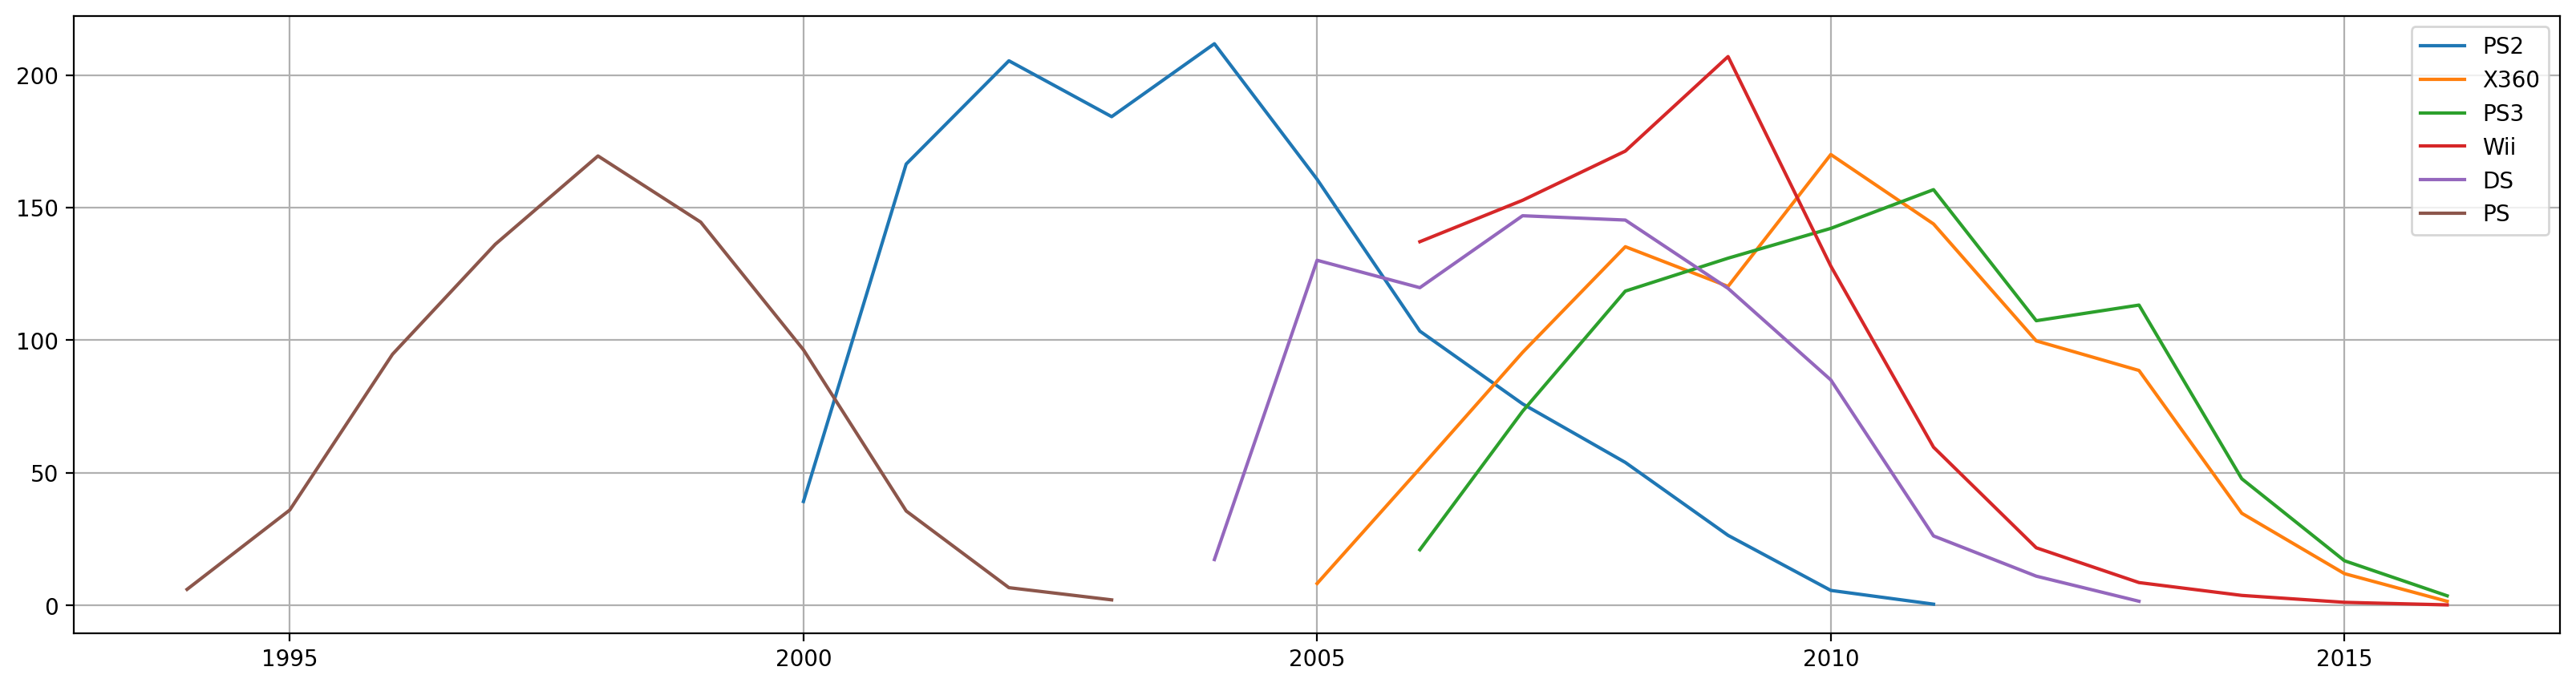

In [110]:
#рисую график, на котором изображена статистика по продажам по каждой из платформ, входящей в топ 6
plt.figure(figsize=(20,5))
plt.plot(data_PS2['year_of_release'],data_PS2['all_sales'], label='PS2')
plt.plot(data_X360['year_of_release'],data_X360['all_sales'], label='X360')
plt.plot(data_PS3['year_of_release'],data_PS3['all_sales'], label='PS3')
plt.plot(data_Wii['year_of_release'],data_Wii['all_sales'], label='Wii')
plt.plot(data_DS['year_of_release'],data_DS['all_sales'], label='DS')
plt.plot(data_PS['year_of_release'],data_PS['all_sales'], label='PS')
plt.legend()
plt.grid(True)
plt.show()

**Вывод: В среднем срок жизни одной платформы составляет 12 лет, спустя столько времени они устаревают и их заменяют более новыми моделями**

## Шаг 4.3. Определение актуального периода

**Из-за того, что игровая индустрия очень динамичная, актуальный период не должен быть слишко большим, но и не должен быть слишком маленьким. Я считаю лучше всего подходит период с 2013 по 2017, надо убрать все неподходящие данные.**

In [114]:
#отсеивание ненужных данных 
data = data.query('year_of_release >= 2013')
#проверка, что все прошло хорошо
data['year_of_release'].unique()

/var/folders/j1/s87kb4rs25s6jmdt61g1wsxr0000gn/T/ipykernel_71075/1214173614.py:2: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  data = data.query('year_of_release >= 2013')


<IntegerArray>
[2013, 2015, 2014, 2016]
Length: 4, dtype: Int64

## Шаг 4.4. Определение лидера по продажам

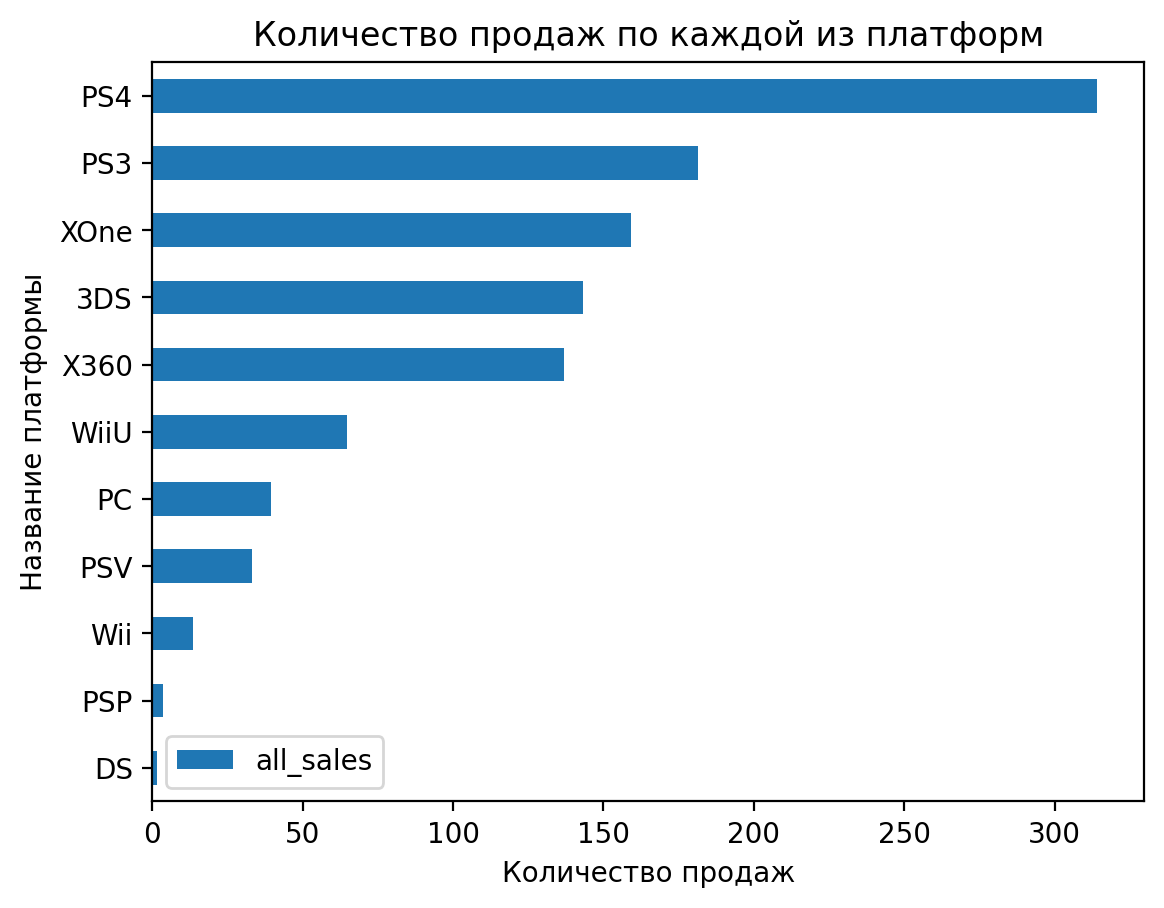

In [117]:
#создаю отдельный датафрейм, который поможет посторить график для определения лидеров
data_leader = data.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values(by='all_sales').plot.barh();
plt.xlabel('Количество продаж')
plt.ylabel('Название платформы')
plt.title('Количество продаж по каждой из платформ');

**В топ 3 по количесву продаж находятся PS4, PS3 и Xbox one.**

In [120]:
#определение всех уникальных значений в столбце platform
data['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [122]:
#делаю обобщенную таблицу по платформам
data_2 = data.pivot_table(index=['platform', 'year_of_release'], values='all_sales', aggfunc='sum').reset_index()
#для каждой из платформ создаю отдельную таблицу
data_X360 = data_2.query('platform == "X360"')
data_PS3 = data_2.query('platform == "PS3"')
data_Wii = data_2.query('platform == "Wii"')
data_DS = data_2.query('platform == "DS"')
data_PSP = data_2.query('platform == "PSP"')
data_PS4 = data_2.query('platform == "PS4"')
data_XOne = data_2.query('platform == "XOne"')
data_WiiU = data_2.query('platform == "WiiU"')
data_PC = data_2.query('platform == "PC"')
data_PSV = data_2.query('platform == "PSV"')
data_3DS = data_2.query('platform == "3DS"')

In [124]:
#изменение цветов для графиков
plt.style.use("https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle")

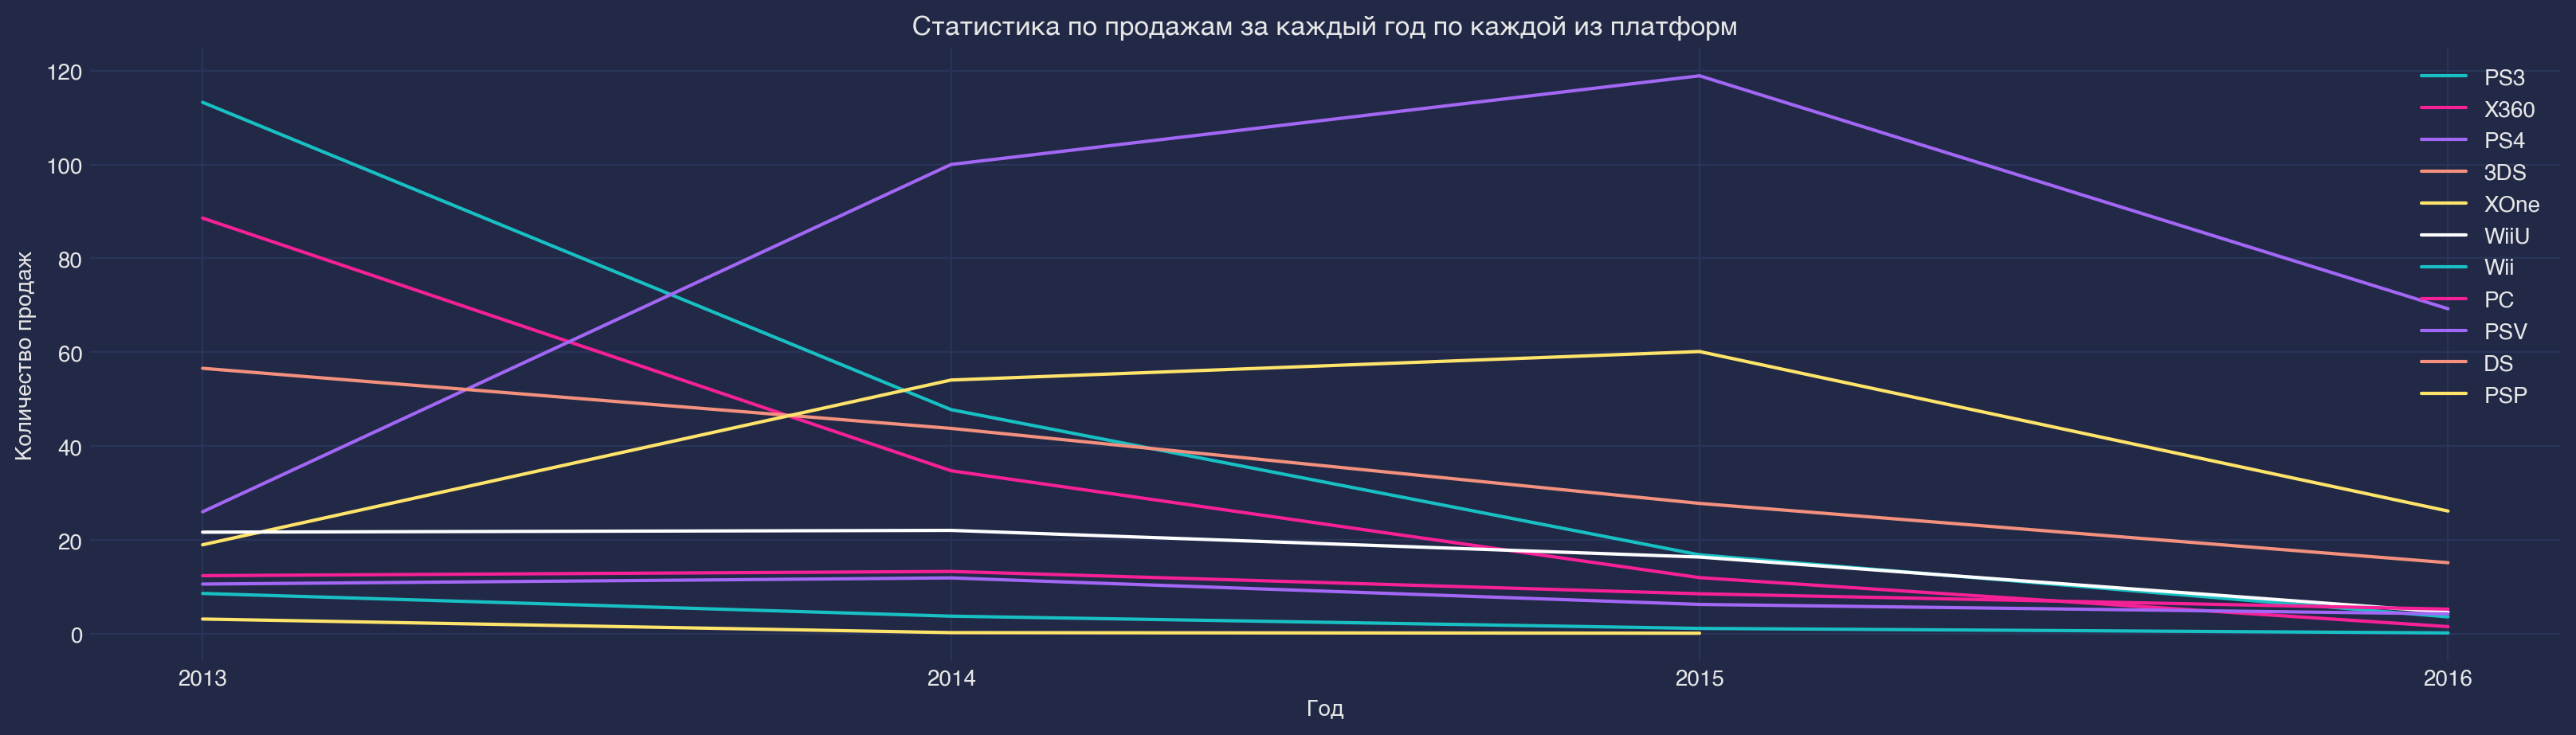

In [125]:
#рисую график, на котором изображена статистика по продажам по каждой из платформ
plt.figure(figsize=(20,5))
plt.plot(data_PS3['year_of_release'],data_PS3['all_sales'], label='PS3')
plt.plot(data_X360['year_of_release'],data_X360['all_sales'], label='X360')
plt.plot(data_PS4['year_of_release'],data_PS4['all_sales'], label='PS4')
plt.plot(data_3DS['year_of_release'],data_3DS['all_sales'], label='3DS')
plt.plot(data_XOne['year_of_release'],data_XOne['all_sales'], label='XOne')
plt.plot(data_WiiU['year_of_release'],data_WiiU['all_sales'], label='WiiU')
plt.plot(data_Wii['year_of_release'],data_Wii['all_sales'], label='Wii')
plt.plot(data_PC['year_of_release'],data_PC['all_sales'], label='PC')
plt.plot(data_PSV['year_of_release'],data_PSV['all_sales'], label='PSV')
plt.plot(data_DS['year_of_release'],data_DS['all_sales'], label='DS')
plt.plot(data_PSP['year_of_release'],data_PSP['all_sales'], label='PSP')
plt.title('Статистика по продажам за каждый год по каждой из платформ')
plt.xlabel('Год')
plt.ylabel('Количество продаж')
plt.xticks([2013, 2014, 2015, 2016])
plt.legend()
plt.grid(True)
plt.show()

### Шаг 4.4. Вывод: Самые персперктивные платформы это - PS4, XOne, 3DS и PSP, продажи игр на эти платормы превыщают 20 млн. в год.  Такие платформы, как PS4 и XOne скорее всего продолжат свой рост. Такие платформы, как  Wii, PSP и DS можно сказать вымерли, скорее всего из-за того что очень сильно устарели.

## Шаг 4.5. Создание графика «ящик с усами» по глобальным продажам игр в разбивке по платформам.

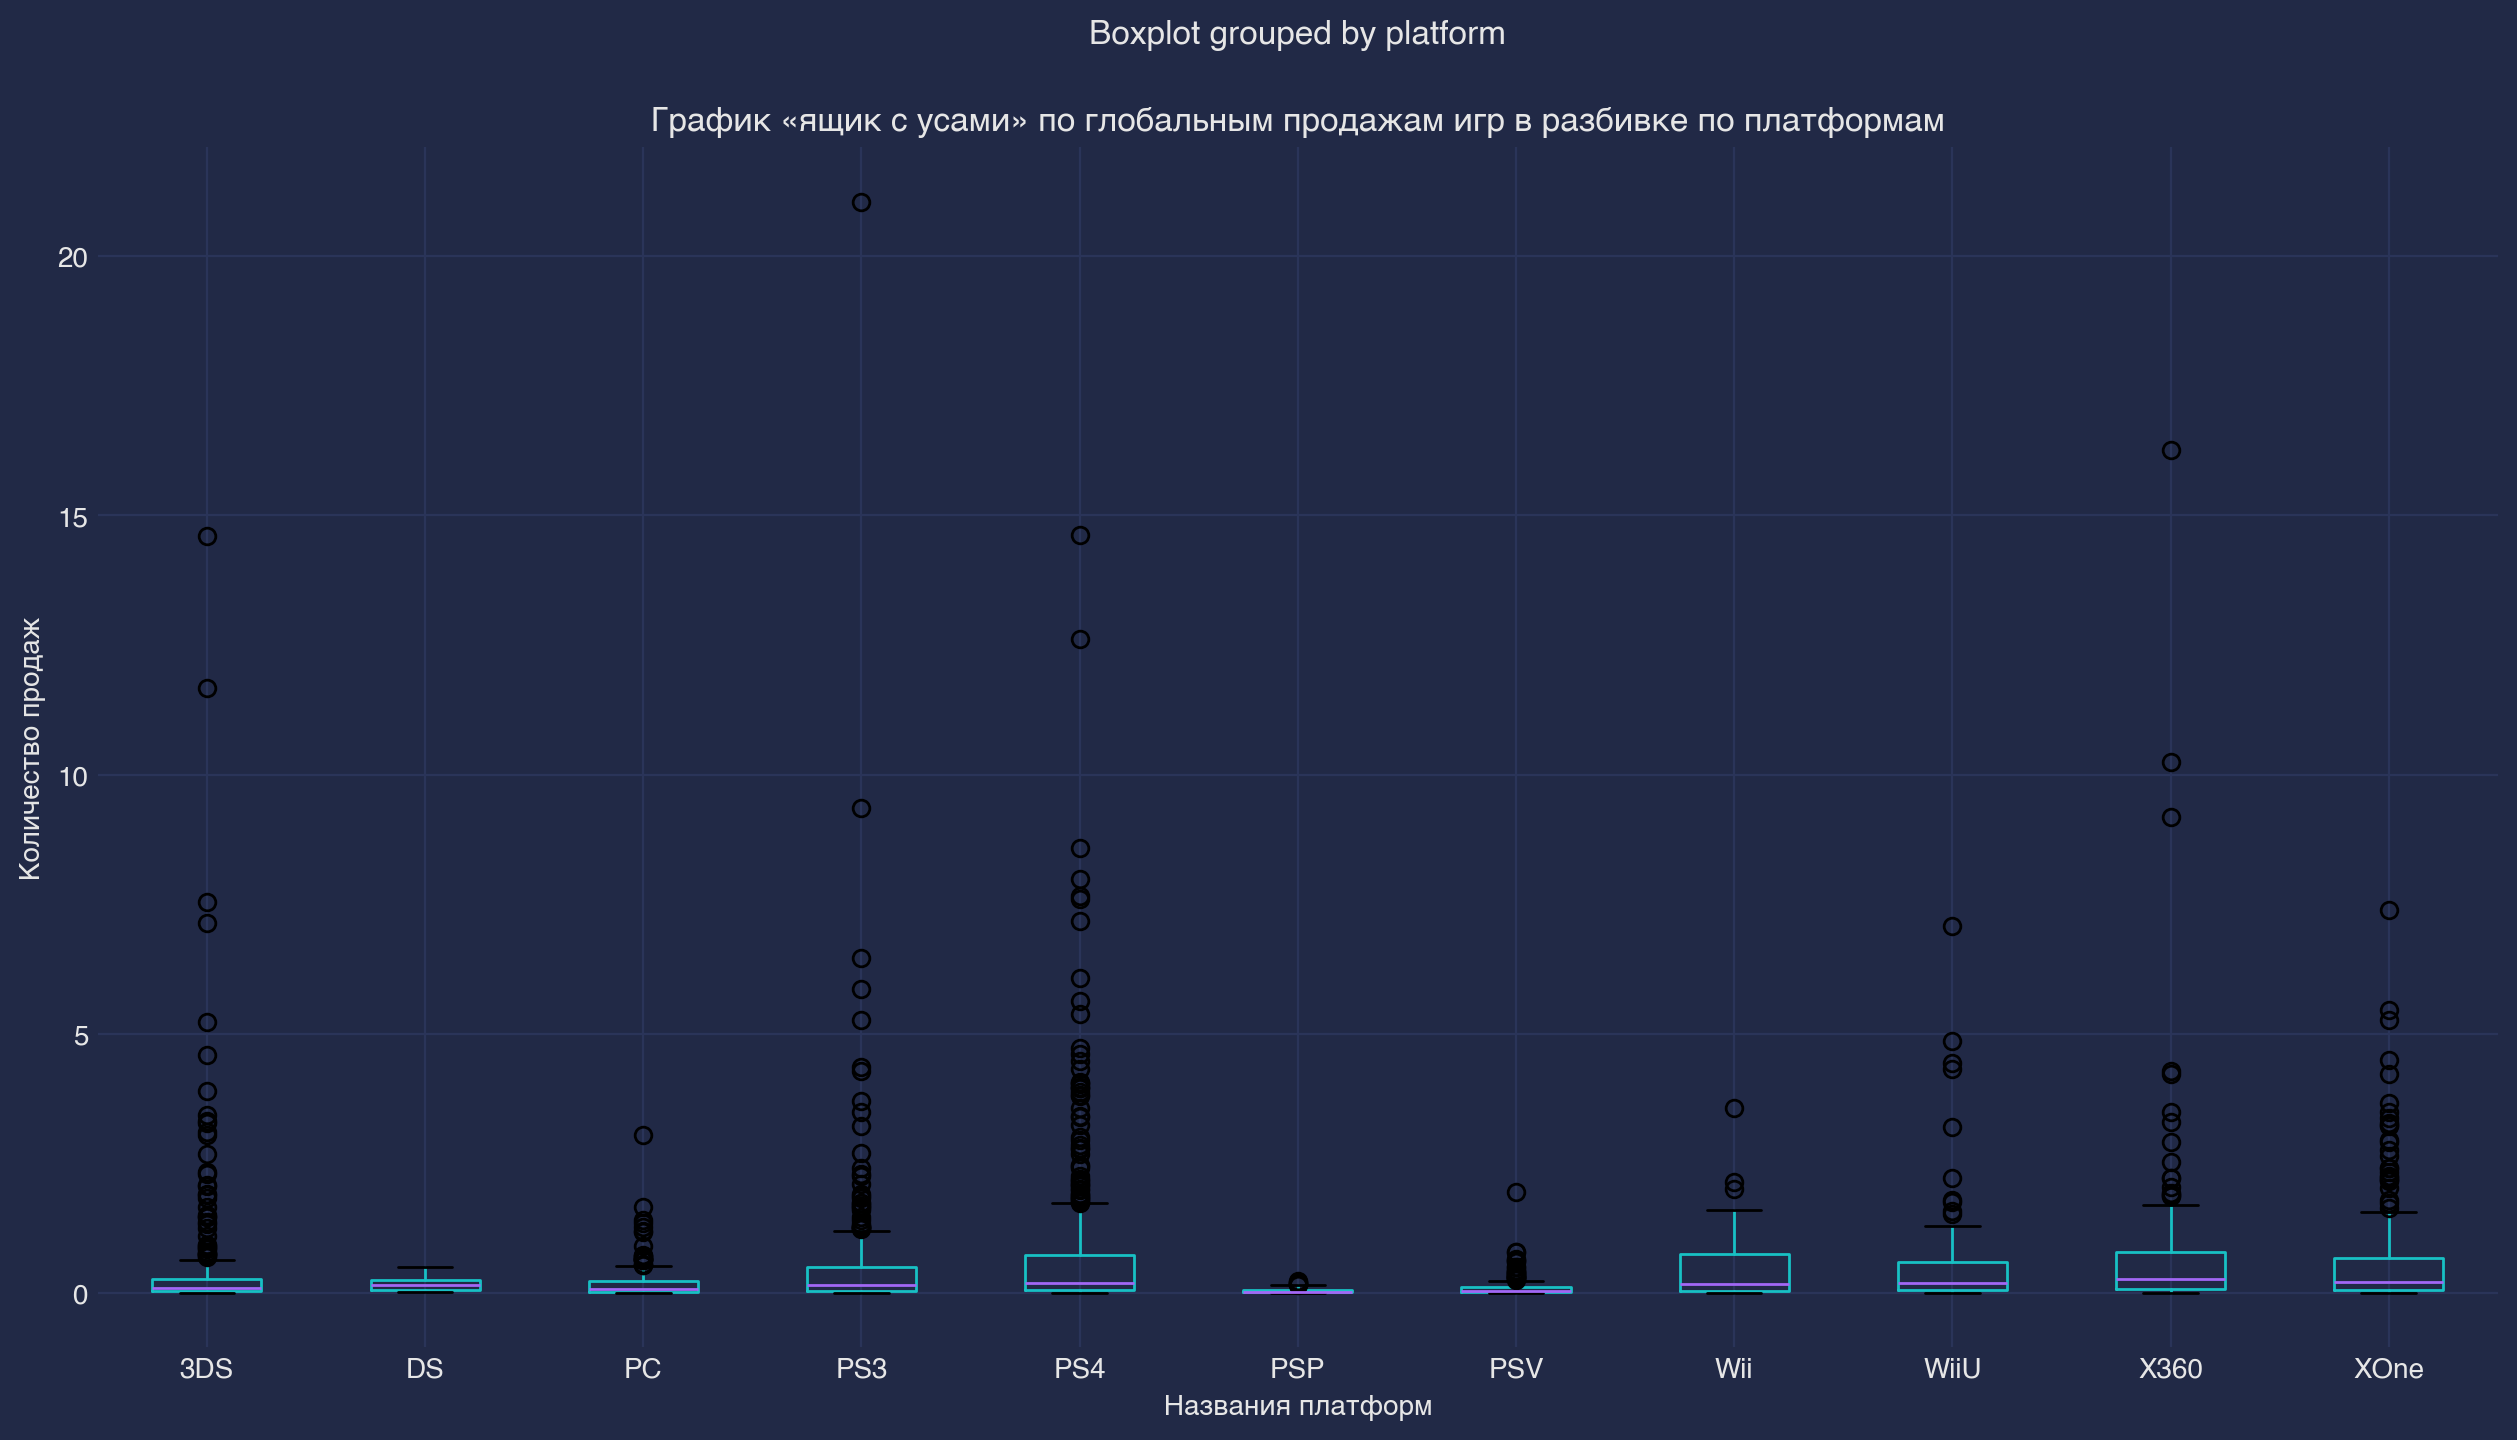

In [130]:
#создание графика «ящик с усами»
data.boxplot('all_sales', by='platform', figsize=(15, 8));
plt.xlabel('Названия платформ')
plt.ylabel('Количество продаж')
plt.title('График «ящик с усами» по глобальным продажам игр в разбивке по платформам');

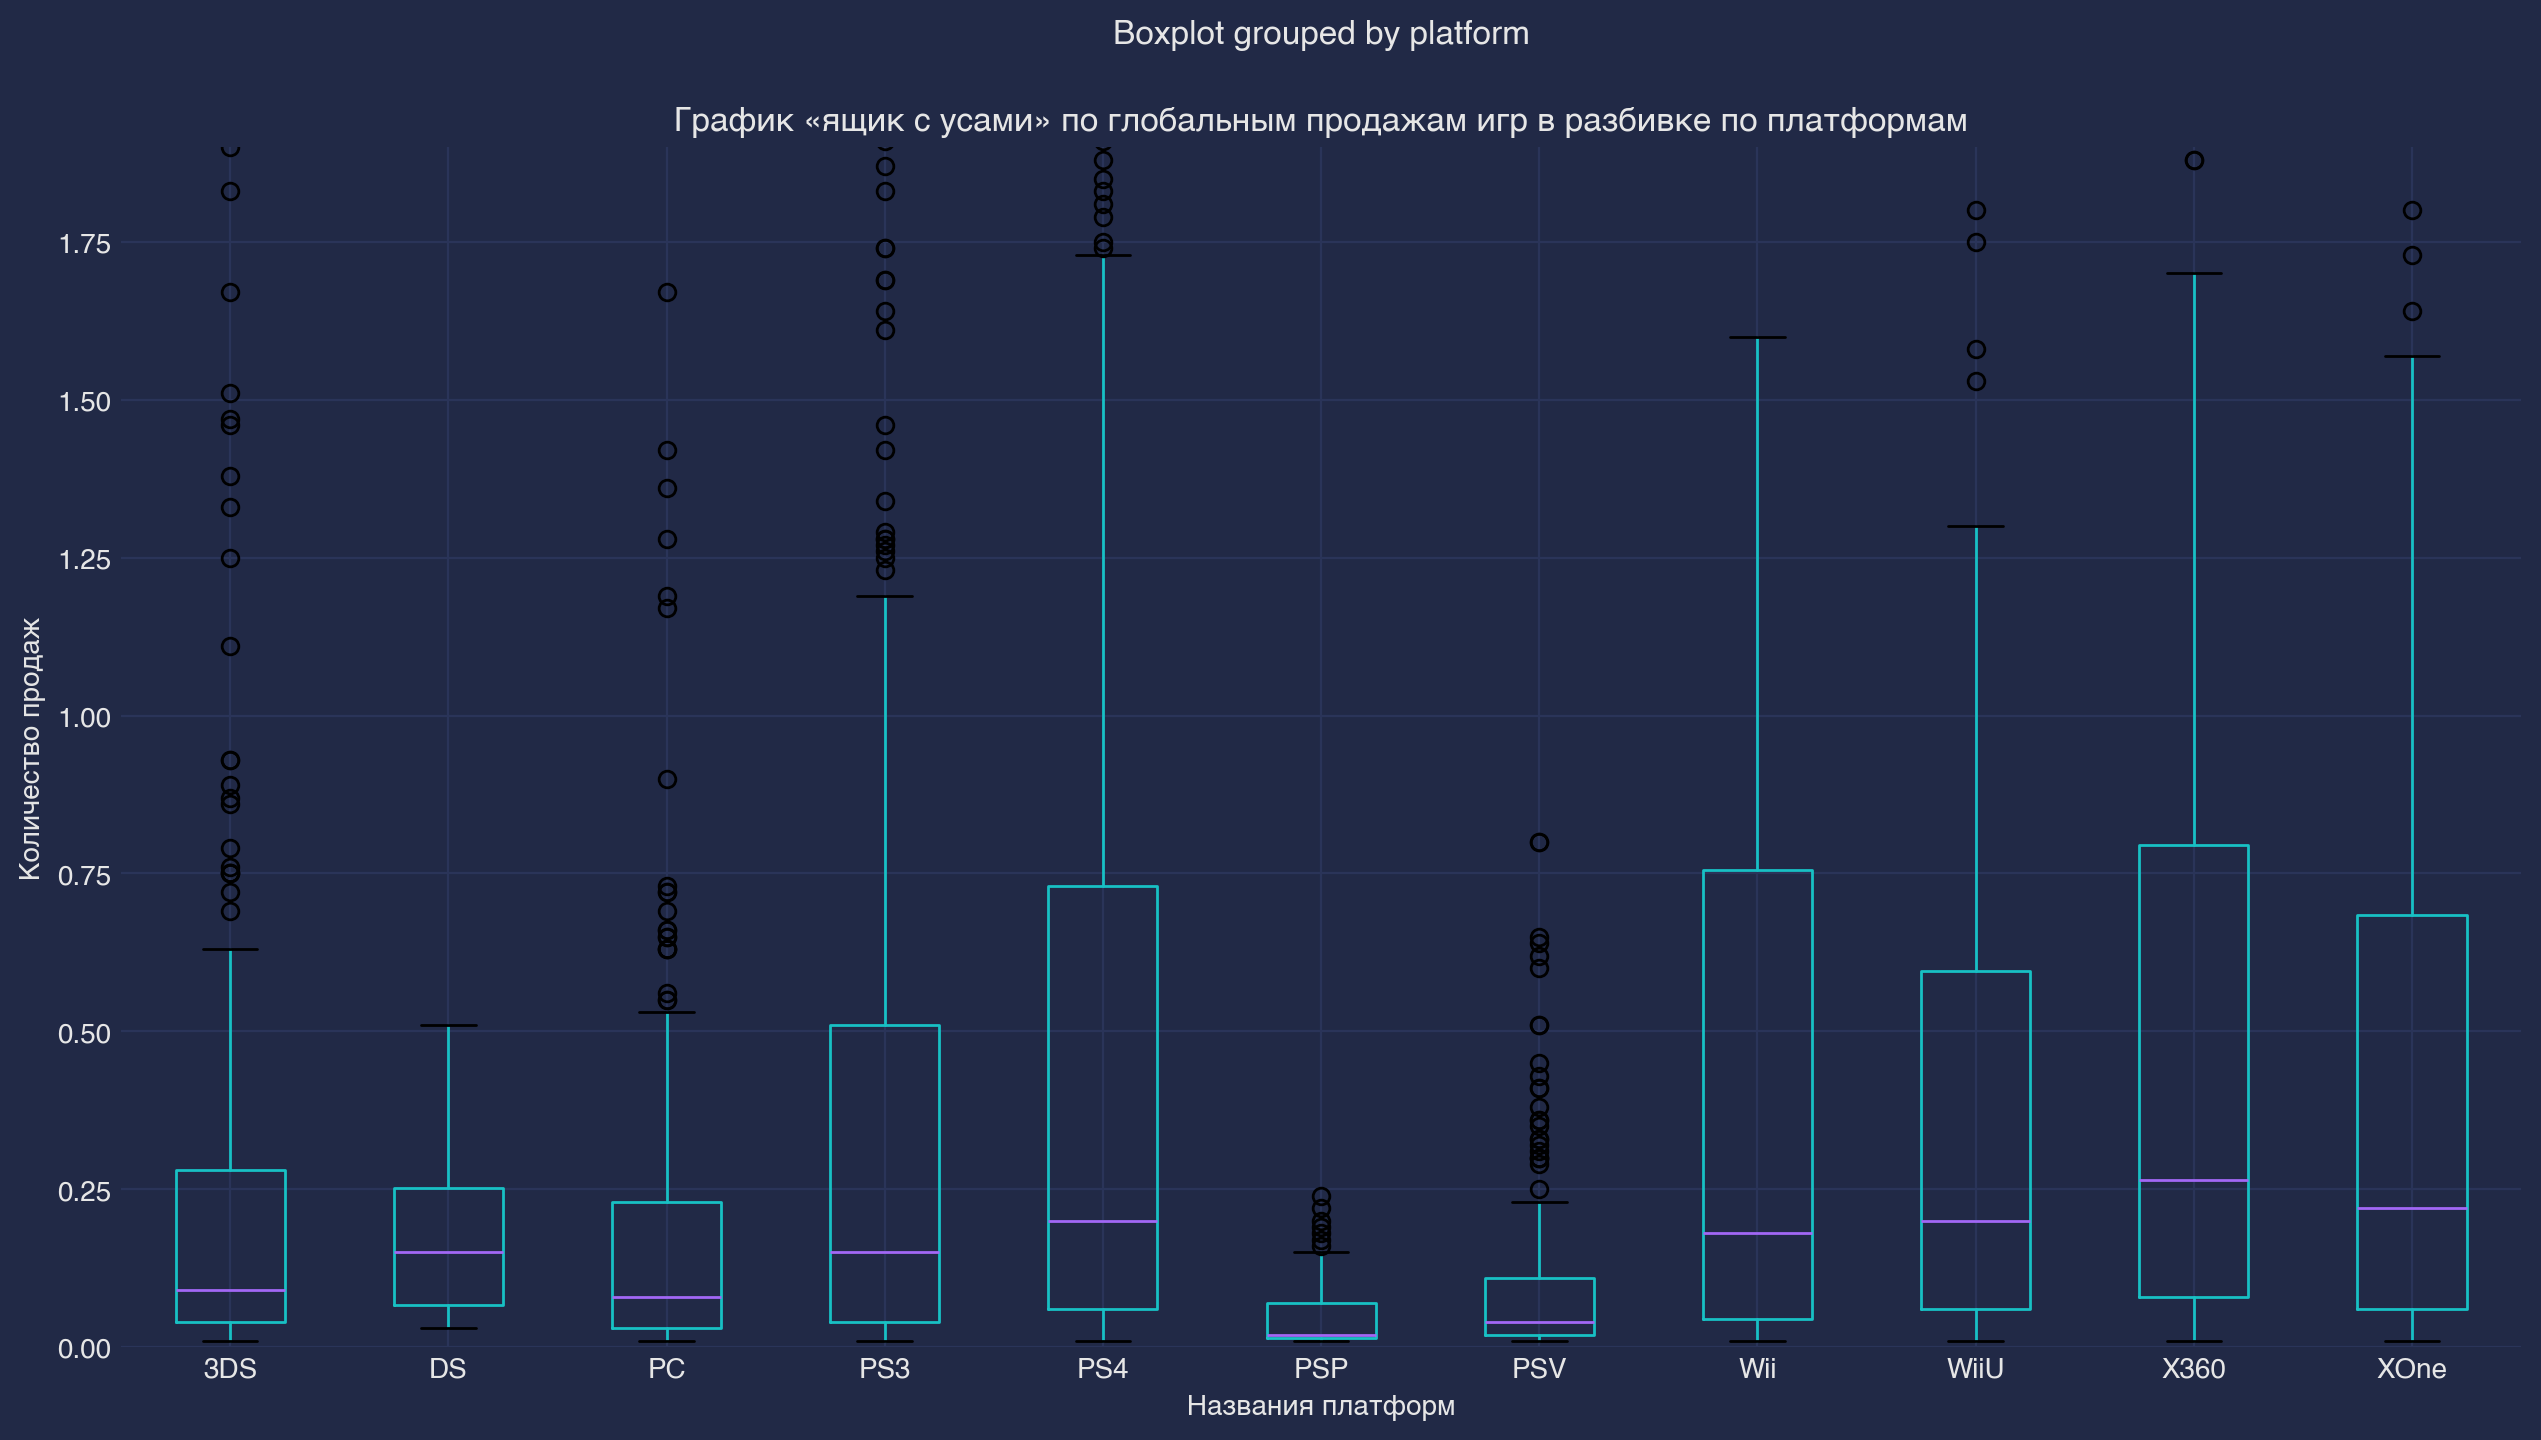

In [132]:
#создание графика «ящик с усами»
data.boxplot('all_sales', by='platform', figsize=(15, 8));
plt.xlabel('Названия платформ')
plt.ylabel('Количество продаж')
plt.title('График «ящик с усами» по глобальным продажам игр в разбивке по платформам');
plt.ylim(0, 1.9);

### Шаг 4.5. Вывод: Рекорд по продажам за год принадлежит платформе PS4, после нее PS3, а затем X360. Насчет платформы DS можно сказать, что у нас есть данные по ней только за один год, скорее всего это 2013, а после этого года наверное пришло что-то новое на замену этой платформы. В среднем за год игр на каждой платформе продается по 20 млн..

## Шаг 4.6. Постройка диаграммы рассеяния и подсчет коэффициента корреляции между отзывами критиков и продажами внутри несколько популярных платформ . Для исследования возьму платформы PS4, PS3 и XOne.

In [136]:
#создаю новый датафрейм для подсчета коэффициента корреляции Пирсона
data_PS4_corr = data.query('platform=="PS4"')

In [138]:
#убираю все пропуски
data_PS4_corr = data_PS4_corr[data_PS4_corr['critic_score'].isna()==False]

In [140]:
#меняю тип данных на float, чтобы не выдавало ошибки
data_PS4_corr['critic_score'] = data_PS4_corr['critic_score'].astype('float')

In [142]:
#считаю коэффициент корреляции Пирсона
data_PS4_corr['critic_score'].corr(data_PS4_corr['all_sales'])

0.4065679020617816

/opt/anaconda3/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:896: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")


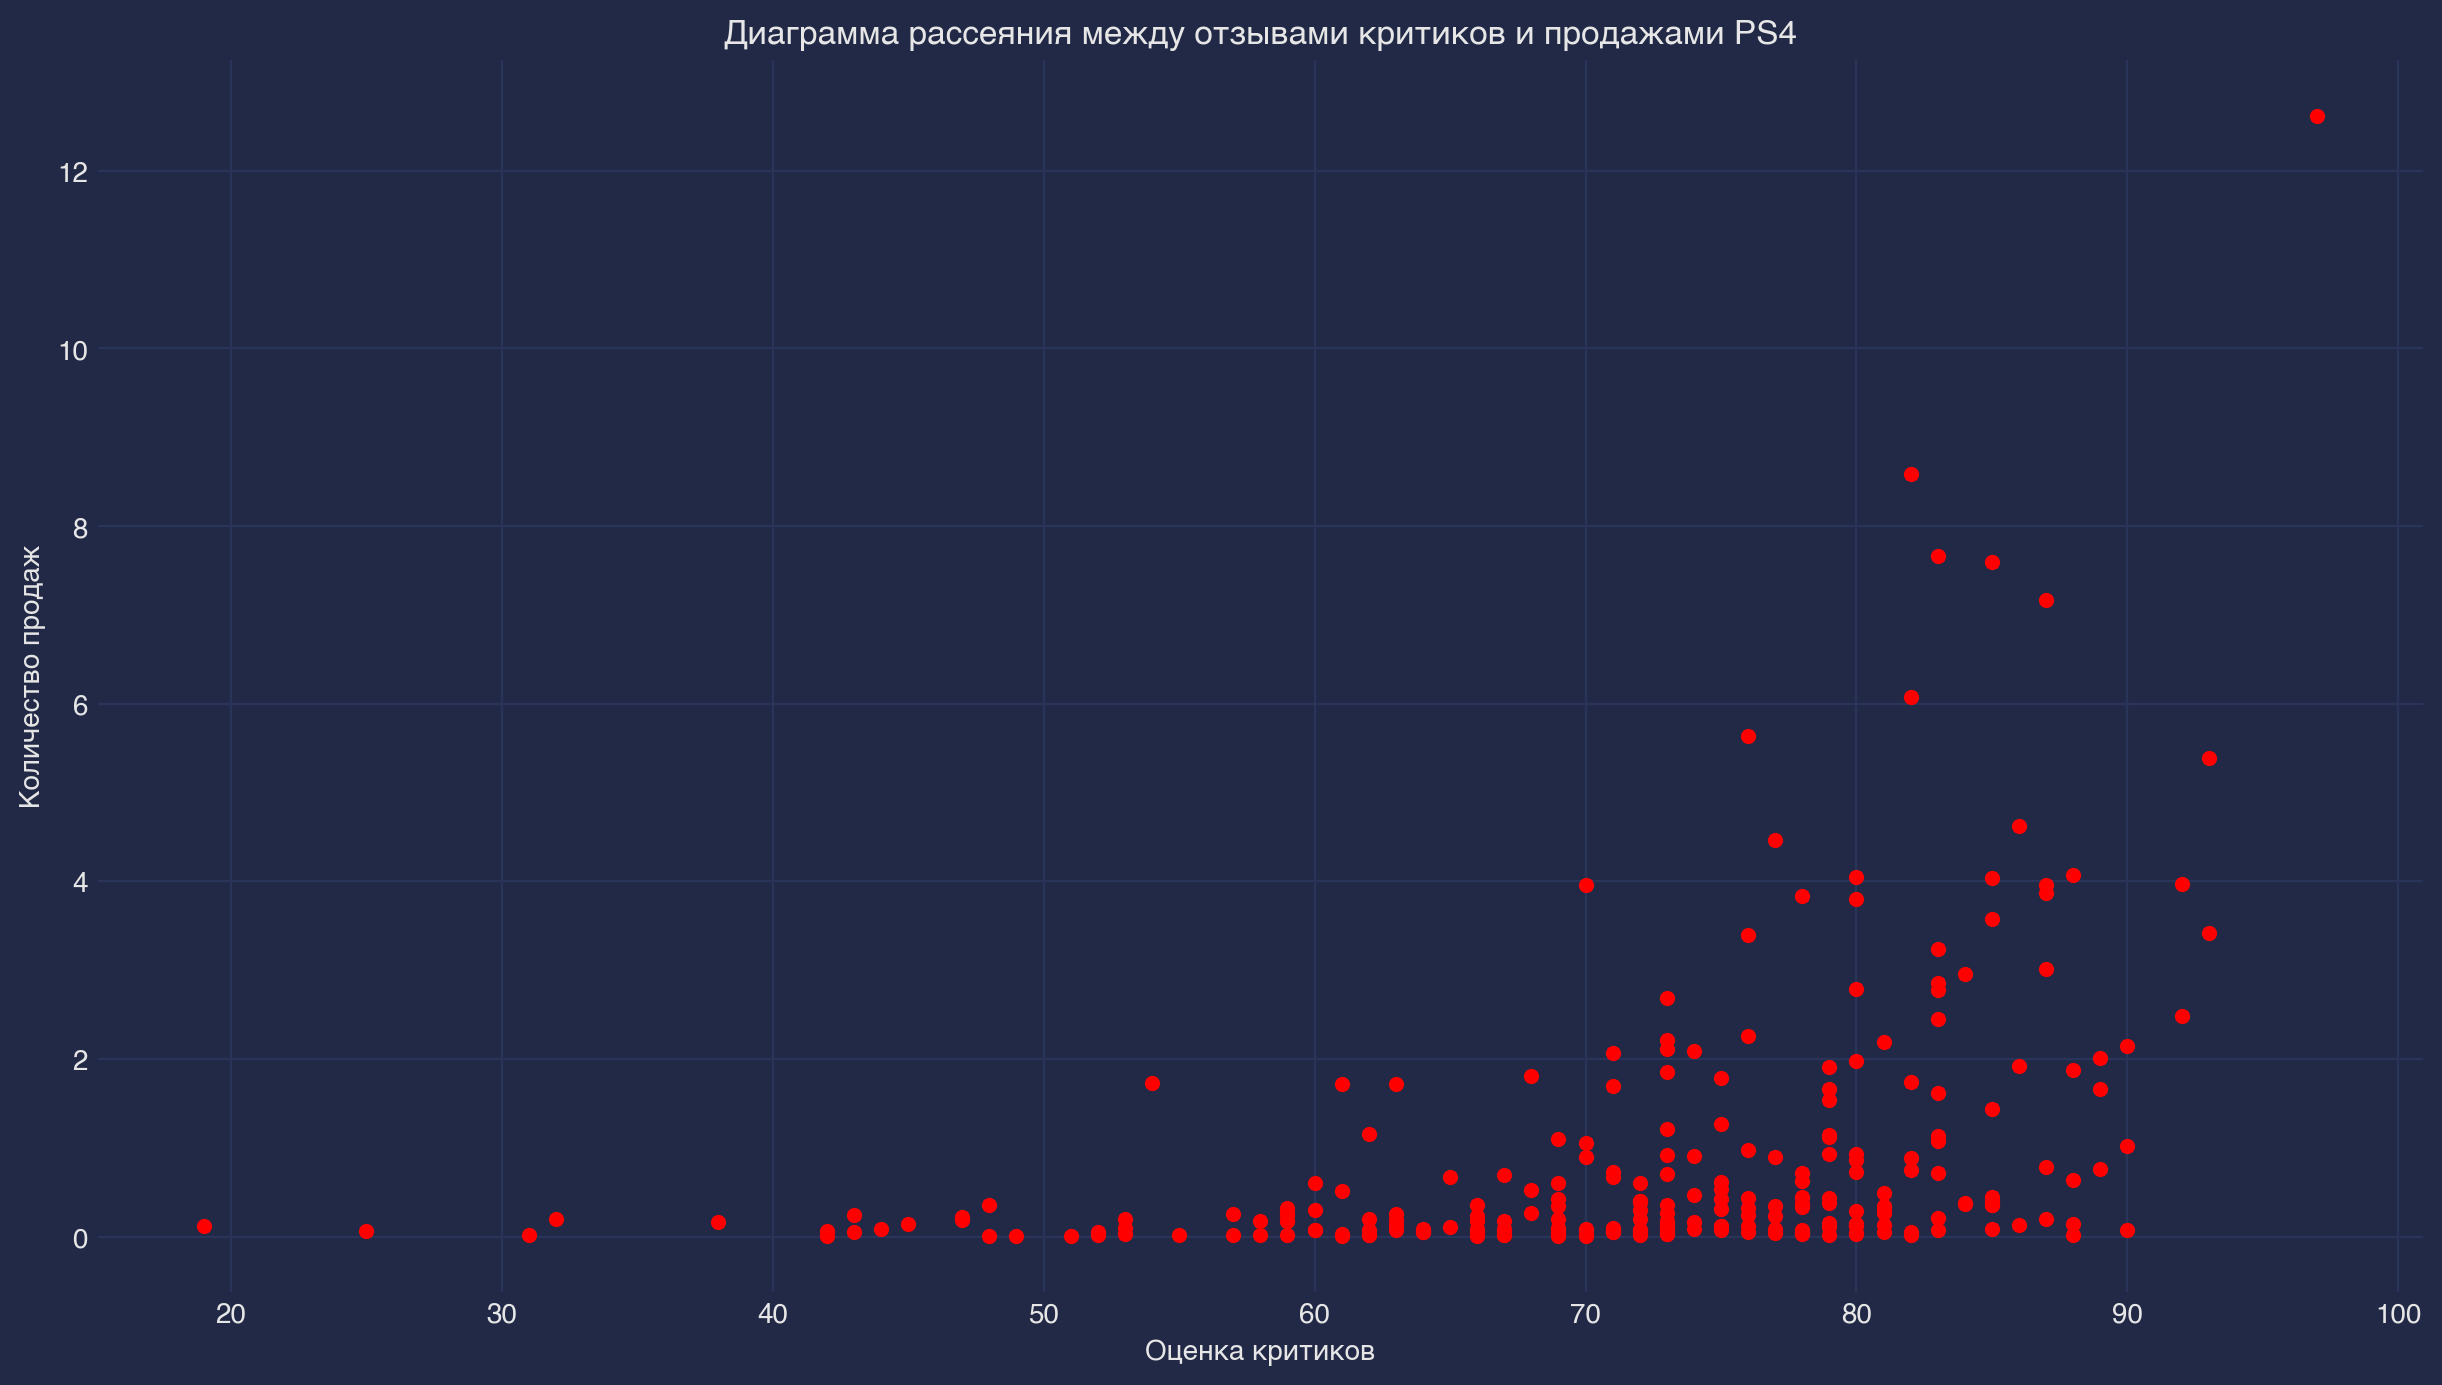

In [144]:
#строю диашрамму рассеяния
data_PS4_corr.plot(kind='scatter', y='all_sales' , x='critic_score', alpha=1, subplots=True, figsize=(15,8), c = 'r');
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж')
plt.title('Диаграмма рассеяния между отзывами критиков и продажами PS4');

In [146]:
#создаю новый датафрейм для подсчета коэффициента корреляции Пирсона
data_PS3_corr = data.query('platform=="PS3"')

In [148]:
#убираю все пропуски
data_PS3_corr = data_PS3_corr[data_PS3_corr['critic_score'].isna()==False]

In [150]:
#меняю тип данных на float, чтобы не выдавало ошибки
data_PS3_corr['critic_score'] = data_PS3_corr['critic_score'].astype('float')

In [152]:
#считаю коэффициент корреляции Пирсона
data_PS3_corr['critic_score'].corr(data_PS3_corr['all_sales'])

0.3342853393371919

/opt/anaconda3/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:896: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")


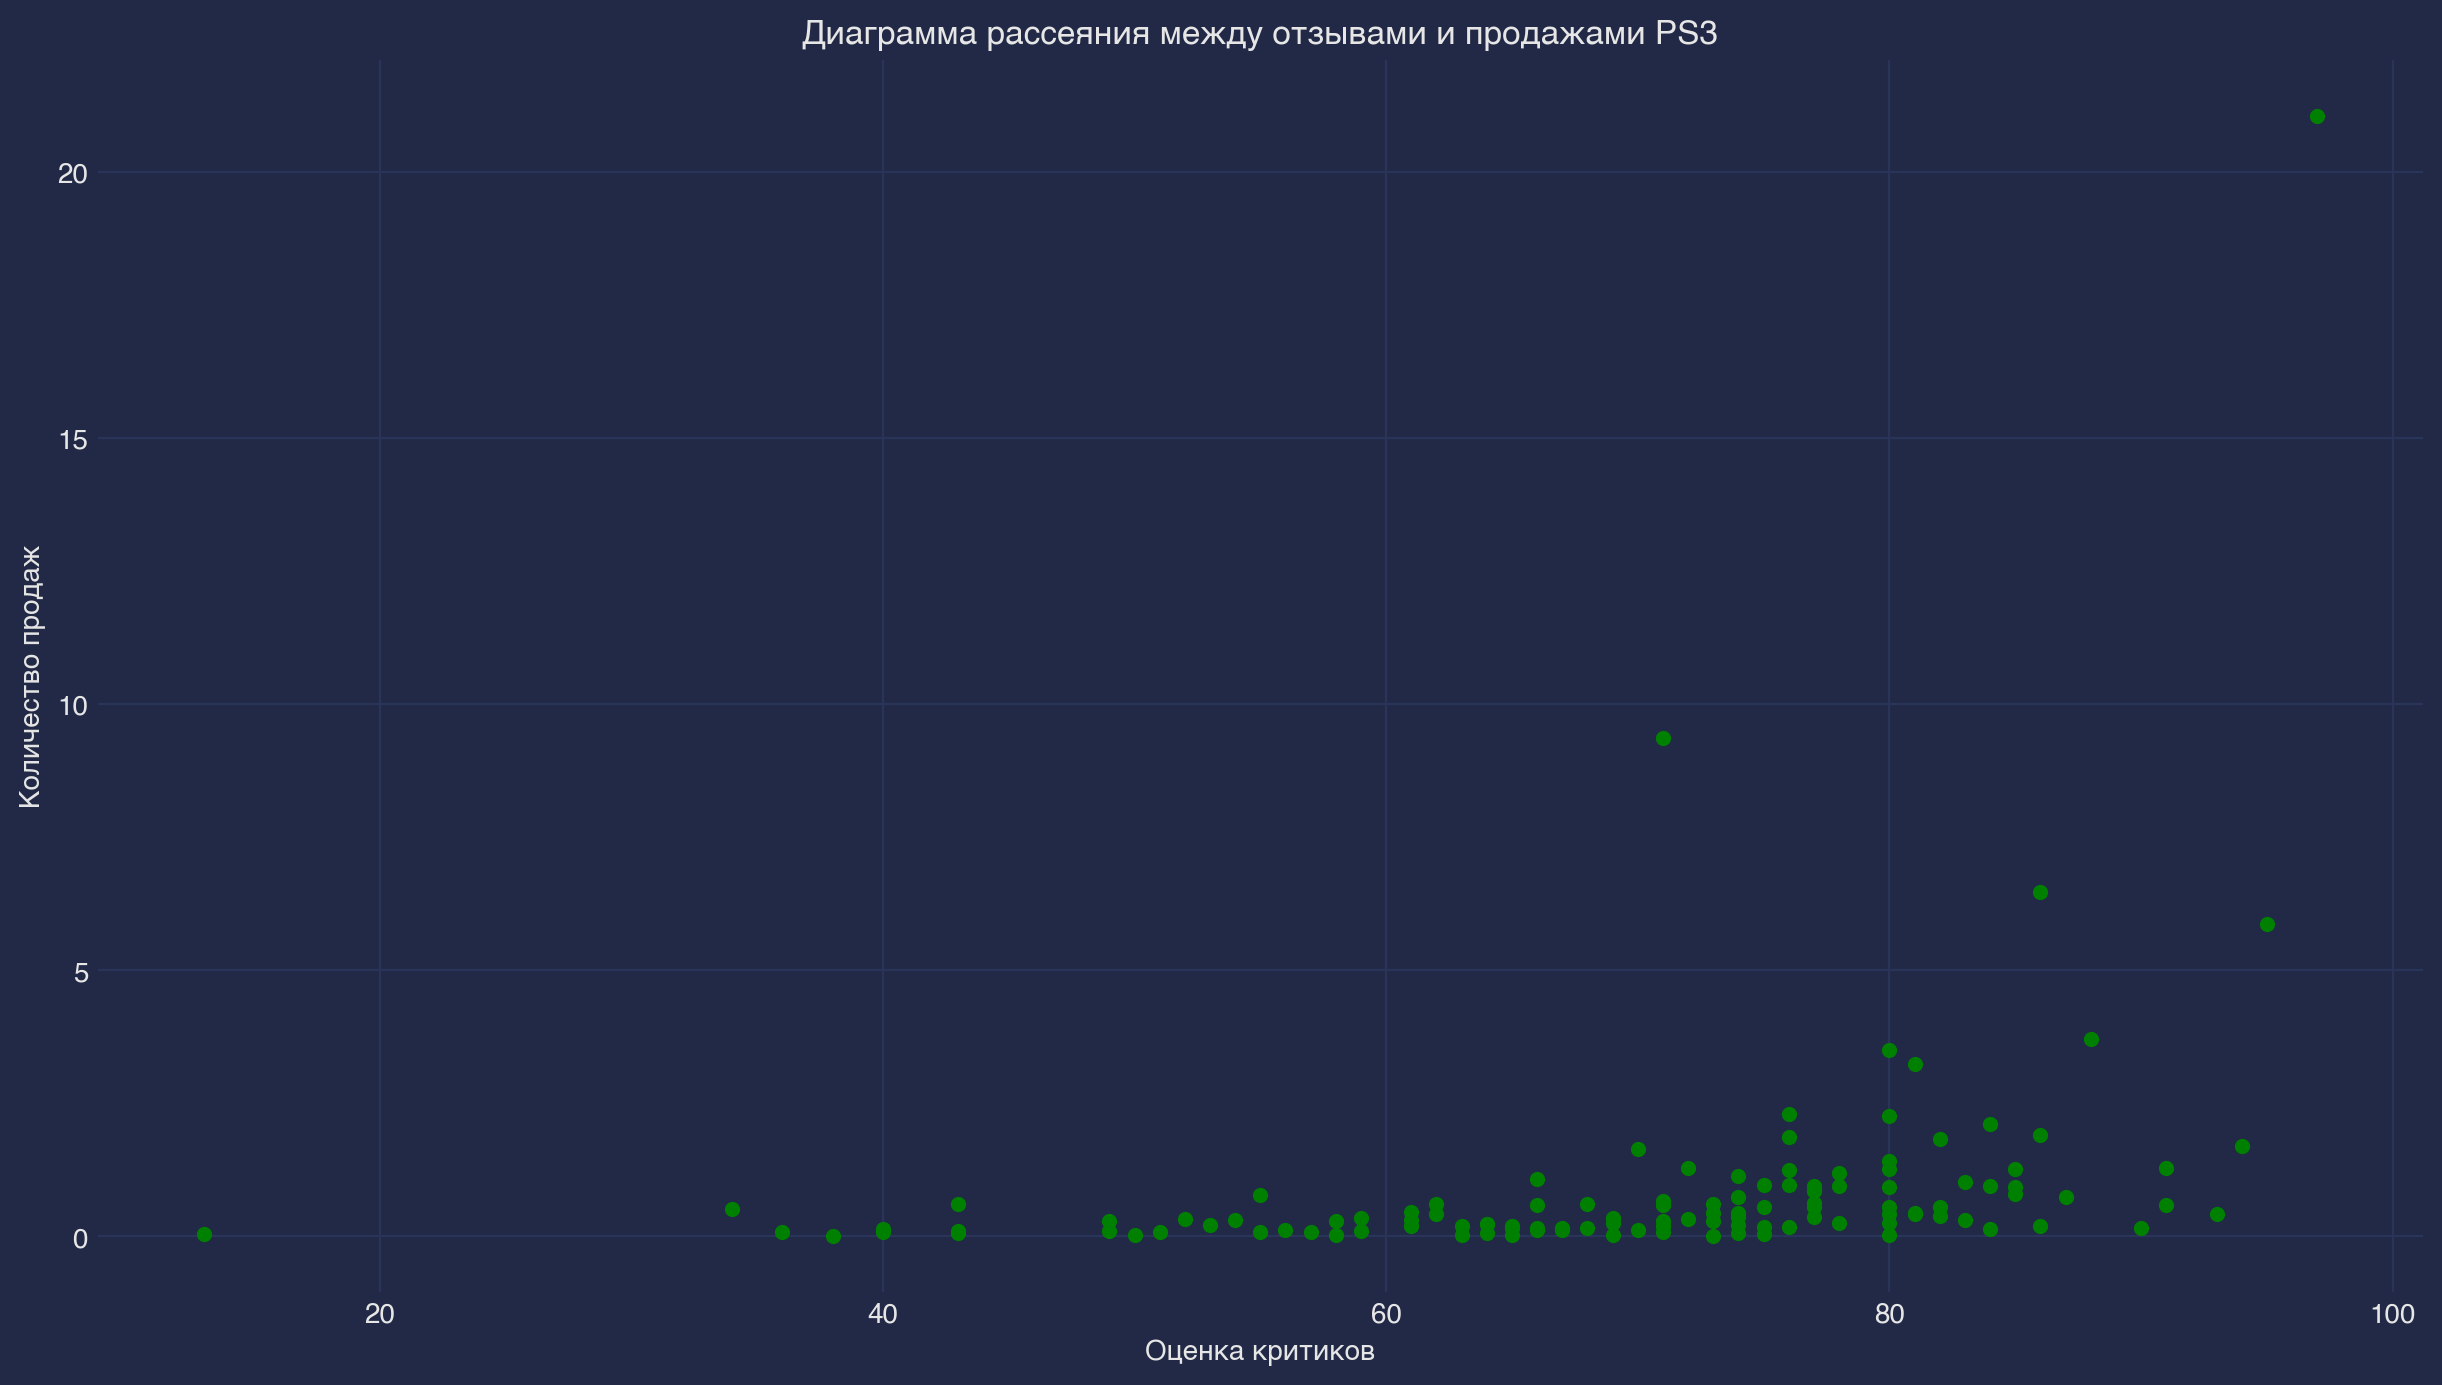

In [154]:
#строю диашрамму рассеяния
data_PS3_corr.plot(kind='scatter', y='all_sales' , x='critic_score', alpha=1, subplots=True, figsize=(15,8), c = 'g');
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж')
plt.title('Диаграмма рассеяния между отзывами и продажами PS3');

In [156]:
#создаю новый датафрейм для подсчета коэффициента корреляции Пирсона
data_xone_corr = data.query('platform=="XOne"')

In [158]:
#убираю все пропуски
data_xone_corr = data_xone_corr[data_xone_corr['critic_score'].isna()==False]

In [160]:
#меняю тип данных на float, чтобы не выдавало ошибки
data_xone_corr['critic_score'] = data_xone_corr['critic_score'].astype('float')

In [162]:
#считаю коэффициент корреляции Пирсона
data_xone_corr['critic_score'].corr(data_xone_corr['all_sales'])

0.4169983280084017

/opt/anaconda3/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:896: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")


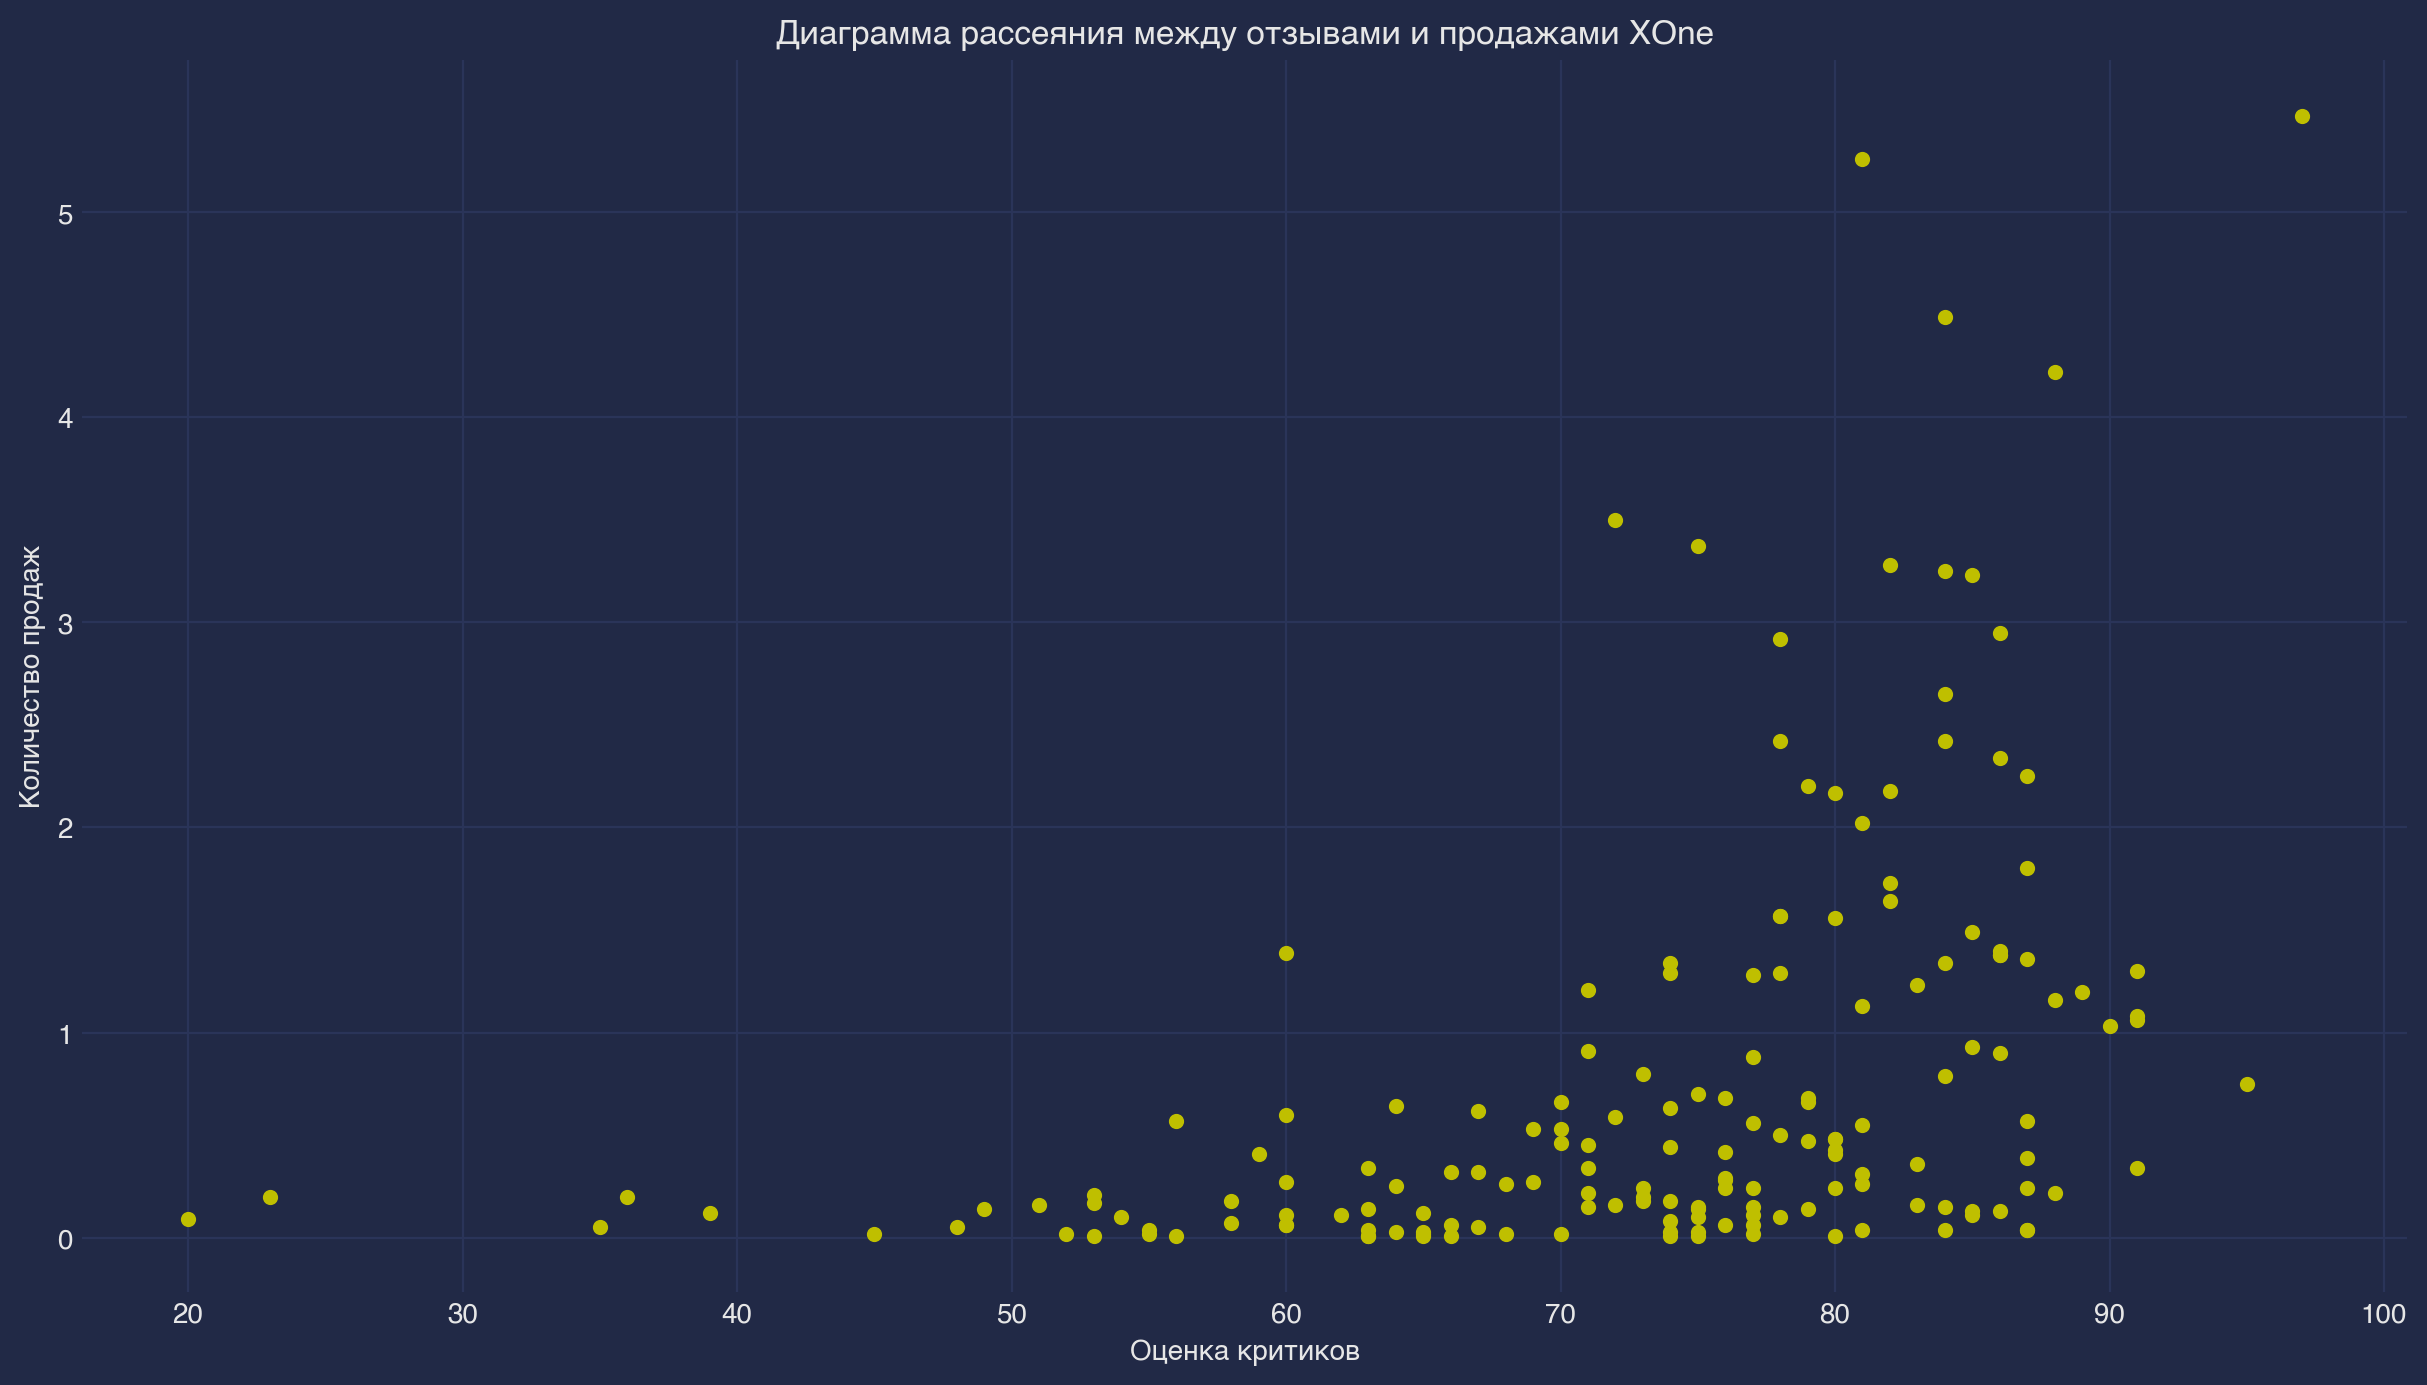

In [164]:
#строю диашрамму рассеяния
data_xone_corr.plot(kind='scatter', y='all_sales' , x='critic_score', alpha=1, subplots=True, figsize=(15,8), c = 'y');
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж')
plt.title('Диаграмма рассеяния между отзывами и продажами XOne');

### Шаг 4.6. Вывод: Коэффициент корреляции между количеством продаж и оценкой критиков у платформ PS4, PS3 и XOne положительный, но не больше 0.5. Это означает, что эти два показатели связаны и зависят друг от друга, но не очень сильно

## Шаг 4.7. Сравнение коэффициентов корреляции между количеством продаж и оценкой критиков

In [170]:
#строю таблицу по которой можно будет найти зависимость между оценкой критиков и количеством продаж
data[['year_of_release', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'all_sales']].corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,all_sales
year_of_release,1.000000,-0.124551,-0.087983,-0.074142,-0.090225,0.064322,-0.117878
na_sales,-0.124551,1.000000,0.769995,0.264513,0.817367,0.301130,0.922617
eu_sales,-0.087983,0.769995,1.000000,0.244616,0.934796,0.280785,0.928031
jp_sales,-0.074142,0.264513,0.244616,1.000000,0.195192,0.134143,0.434394
other_sales,-0.090225,0.817367,0.934796,0.195192,1.000000,0.275289,0.921370
critic_score,0.064322,0.301130,0.280785,0.134143,0.275289,1.000000,0.313700
all_sales,-0.117878,0.922617,0.928031,0.434394,0.921370,0.313700,1.000000


### Шаг 4.7. Вывод: общий коэффициент корреляции между количеством продаж и оценкой критиков и коэффициент корреляции между количеством продаж и оценкой критиков самых популярных платформ примерно схожы. Можно сделать вывод, что оценка критиков влияет на продоваемость игры, но не очень сильно.

## Шаг 4.8. Постройка диаграммы рассеяния и подсчет коэффициента корреляции между отзывами пользователей и продажами внутри несколько популярных платформ . Для исследования возьму платформы PS4, PS3 и XOne.

In [174]:
#меняю тип данных на float
data['user_score'] = pd.to_numeric(data['user_score'])

/var/folders/j1/s87kb4rs25s6jmdt61g1wsxr0000gn/T/ipykernel_71075/2576846387.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['user_score'] = pd.to_numeric(data['user_score'])


In [176]:
#проверяю, что все получилось
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 16 to 16714
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   name                               2233 non-null   object 
 1   platform                           2233 non-null   object 
 2   year_of_release                    2233 non-null   Int64  
 3   genre                              2233 non-null   object 
 4   na_sales                           2233 non-null   float64
 5   eu_sales                           2233 non-null   float64
 6   jp_sales                           2233 non-null   float64
 7   other_sales                        2233 non-null   float64
 8   critic_score                       991 non-null    Int64  
 9   user_score                         2233 non-null   float64
 10  rating                             1256 non-null   object 
 11  all_sales                          2233 non-null   float64


In [178]:
#создаю новый датафрейм для подсчета коэффициента корреляции Пирсона
data_PS4_corr = data.query('platform=="PS4"')

In [180]:
#убираю все нолики
data_PS4_corr = data_PS4_corr[data_PS4_corr['user_score']!=0]

In [182]:
#считаю коэффициент корреляции Пирсона
data_PS4_corr['user_score'].corr(data_PS4_corr['all_sales'])

-0.03195711020455643

/opt/anaconda3/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:896: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")


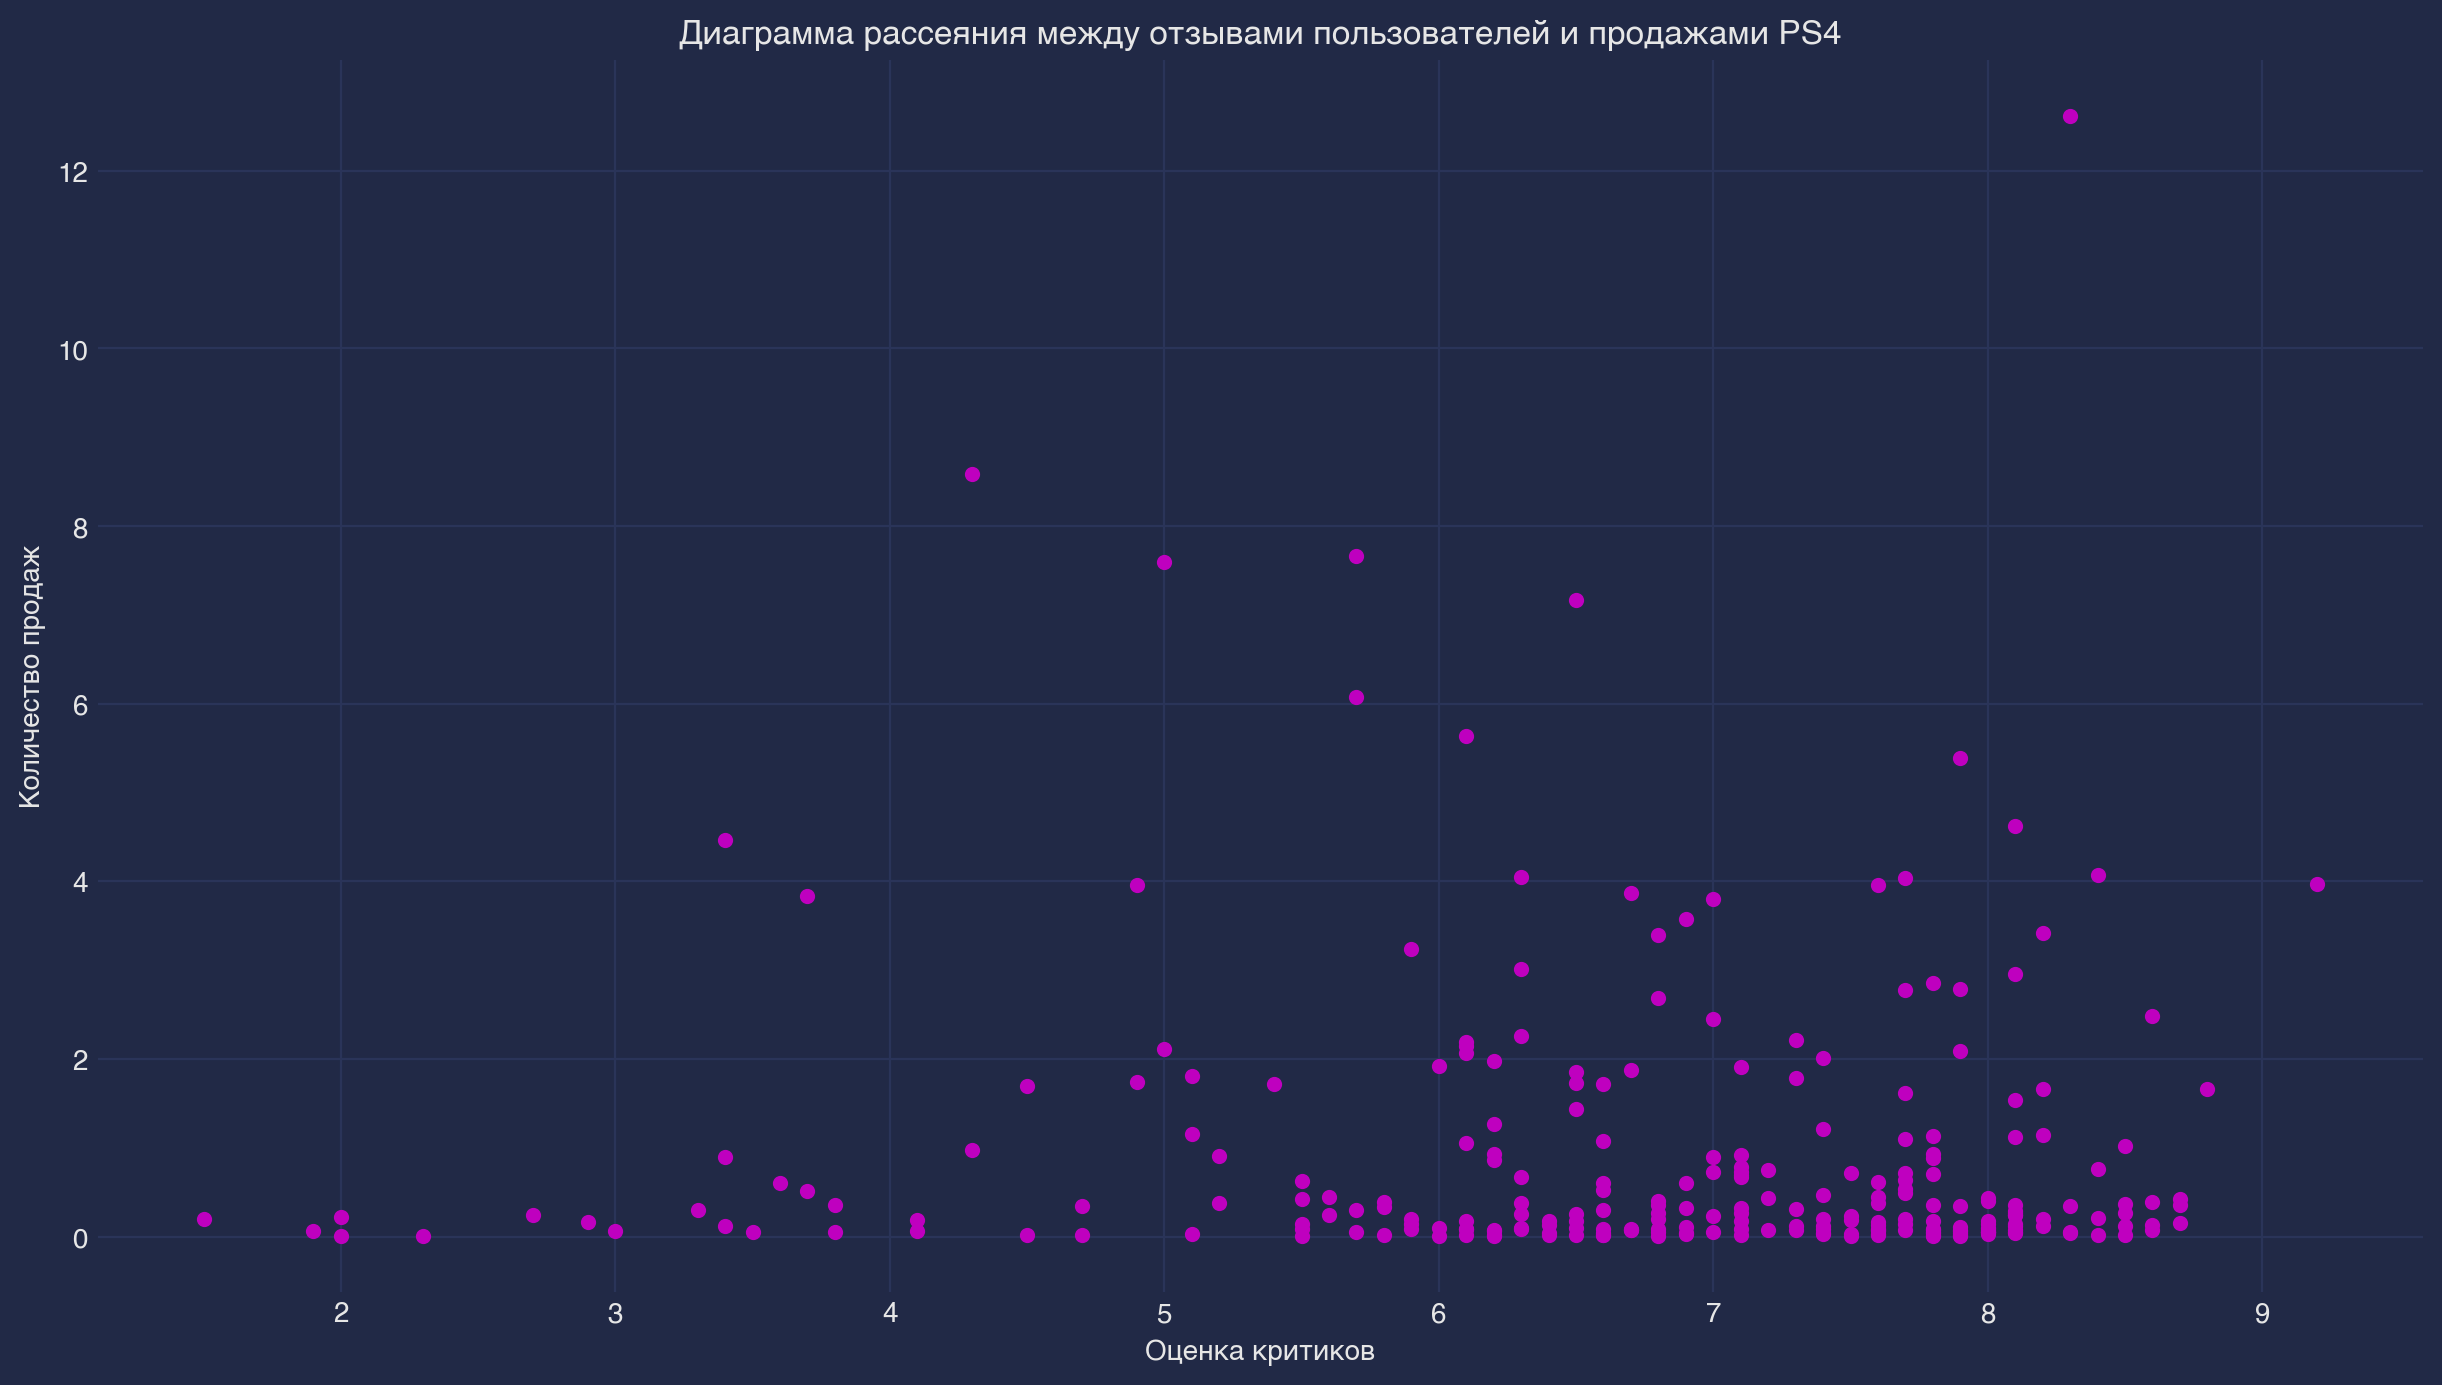

In [184]:
#строю диашрамму рассеяния
data_PS4_corr.plot(kind='scatter', y='all_sales' , x='user_score', alpha=1, subplots=True, figsize=(15,8), c = 'm');
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж')
plt.title('Диаграмма рассеяния между отзывами пользователей и продажами PS4');

In [186]:
#создаю новый датафрейм для подсчета коэффициента корреляции Пирсона
data_PS3_corr = data.query('platform=="PS3"')

In [188]:
#убираю все нолики
data_PS3_corr = data_PS3_corr[data_PS3_corr['user_score']!=0]

In [190]:
#считаю коэффициент корреляции Пирсона
data_PS3_corr['user_score'].corr(data_PS3_corr['all_sales'])

0.0023944027357566907

/opt/anaconda3/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:896: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")


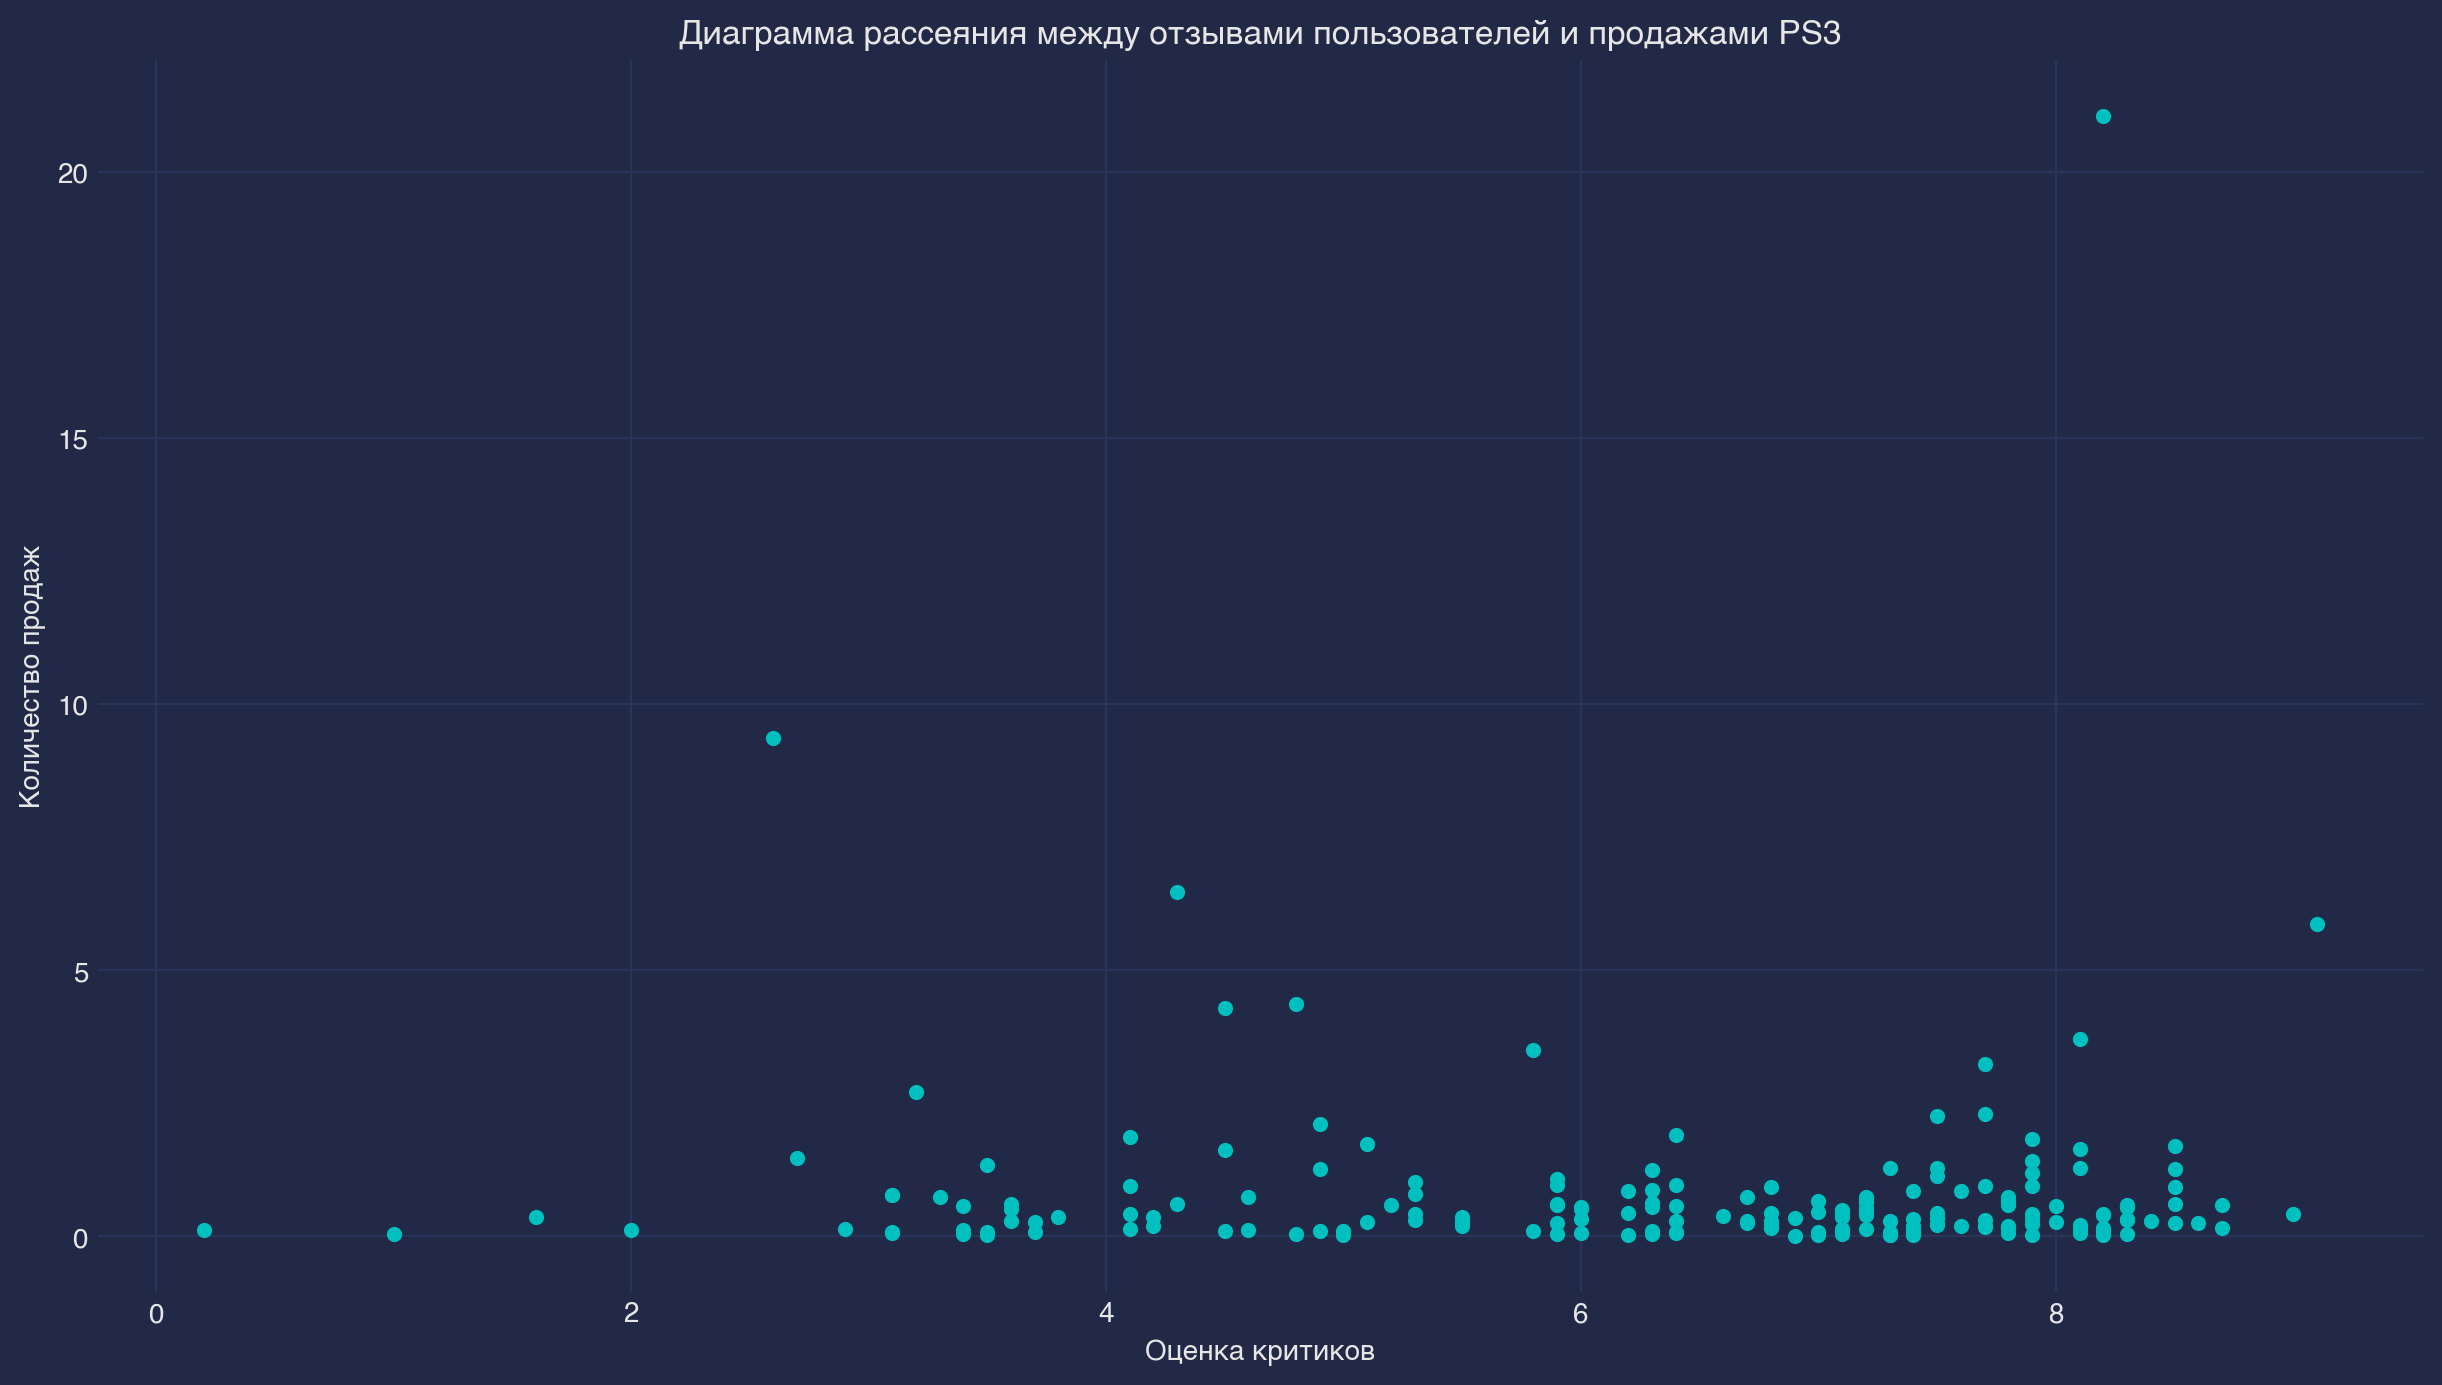

In [192]:
#строю диашрамму рассеяния
data_PS3_corr.plot(kind='scatter', y='all_sales' , x='user_score', alpha=1, subplots=True, figsize=(15,8), c = 'c');
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж')
plt.title('Диаграмма рассеяния между отзывами пользователей и продажами PS3');

In [194]:
#создаю новый датафрейм для подсчета коэффициента корреляции Пирсона
data_xone_corr = data.query('platform=="XOne"')

In [196]:
#убираю все нолики
data_xone_corr = data_xone_corr[data_xone_corr['user_score']!=0]

In [198]:
#считаю коэффициент корреляции Пирсона
data_xone_corr['user_score'].corr(data_xone_corr['all_sales'])

-0.06892505328279416

/opt/anaconda3/lib/python3.12/site-packages/pandas/plotting/_matplotlib/core.py:896: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(loc="best")


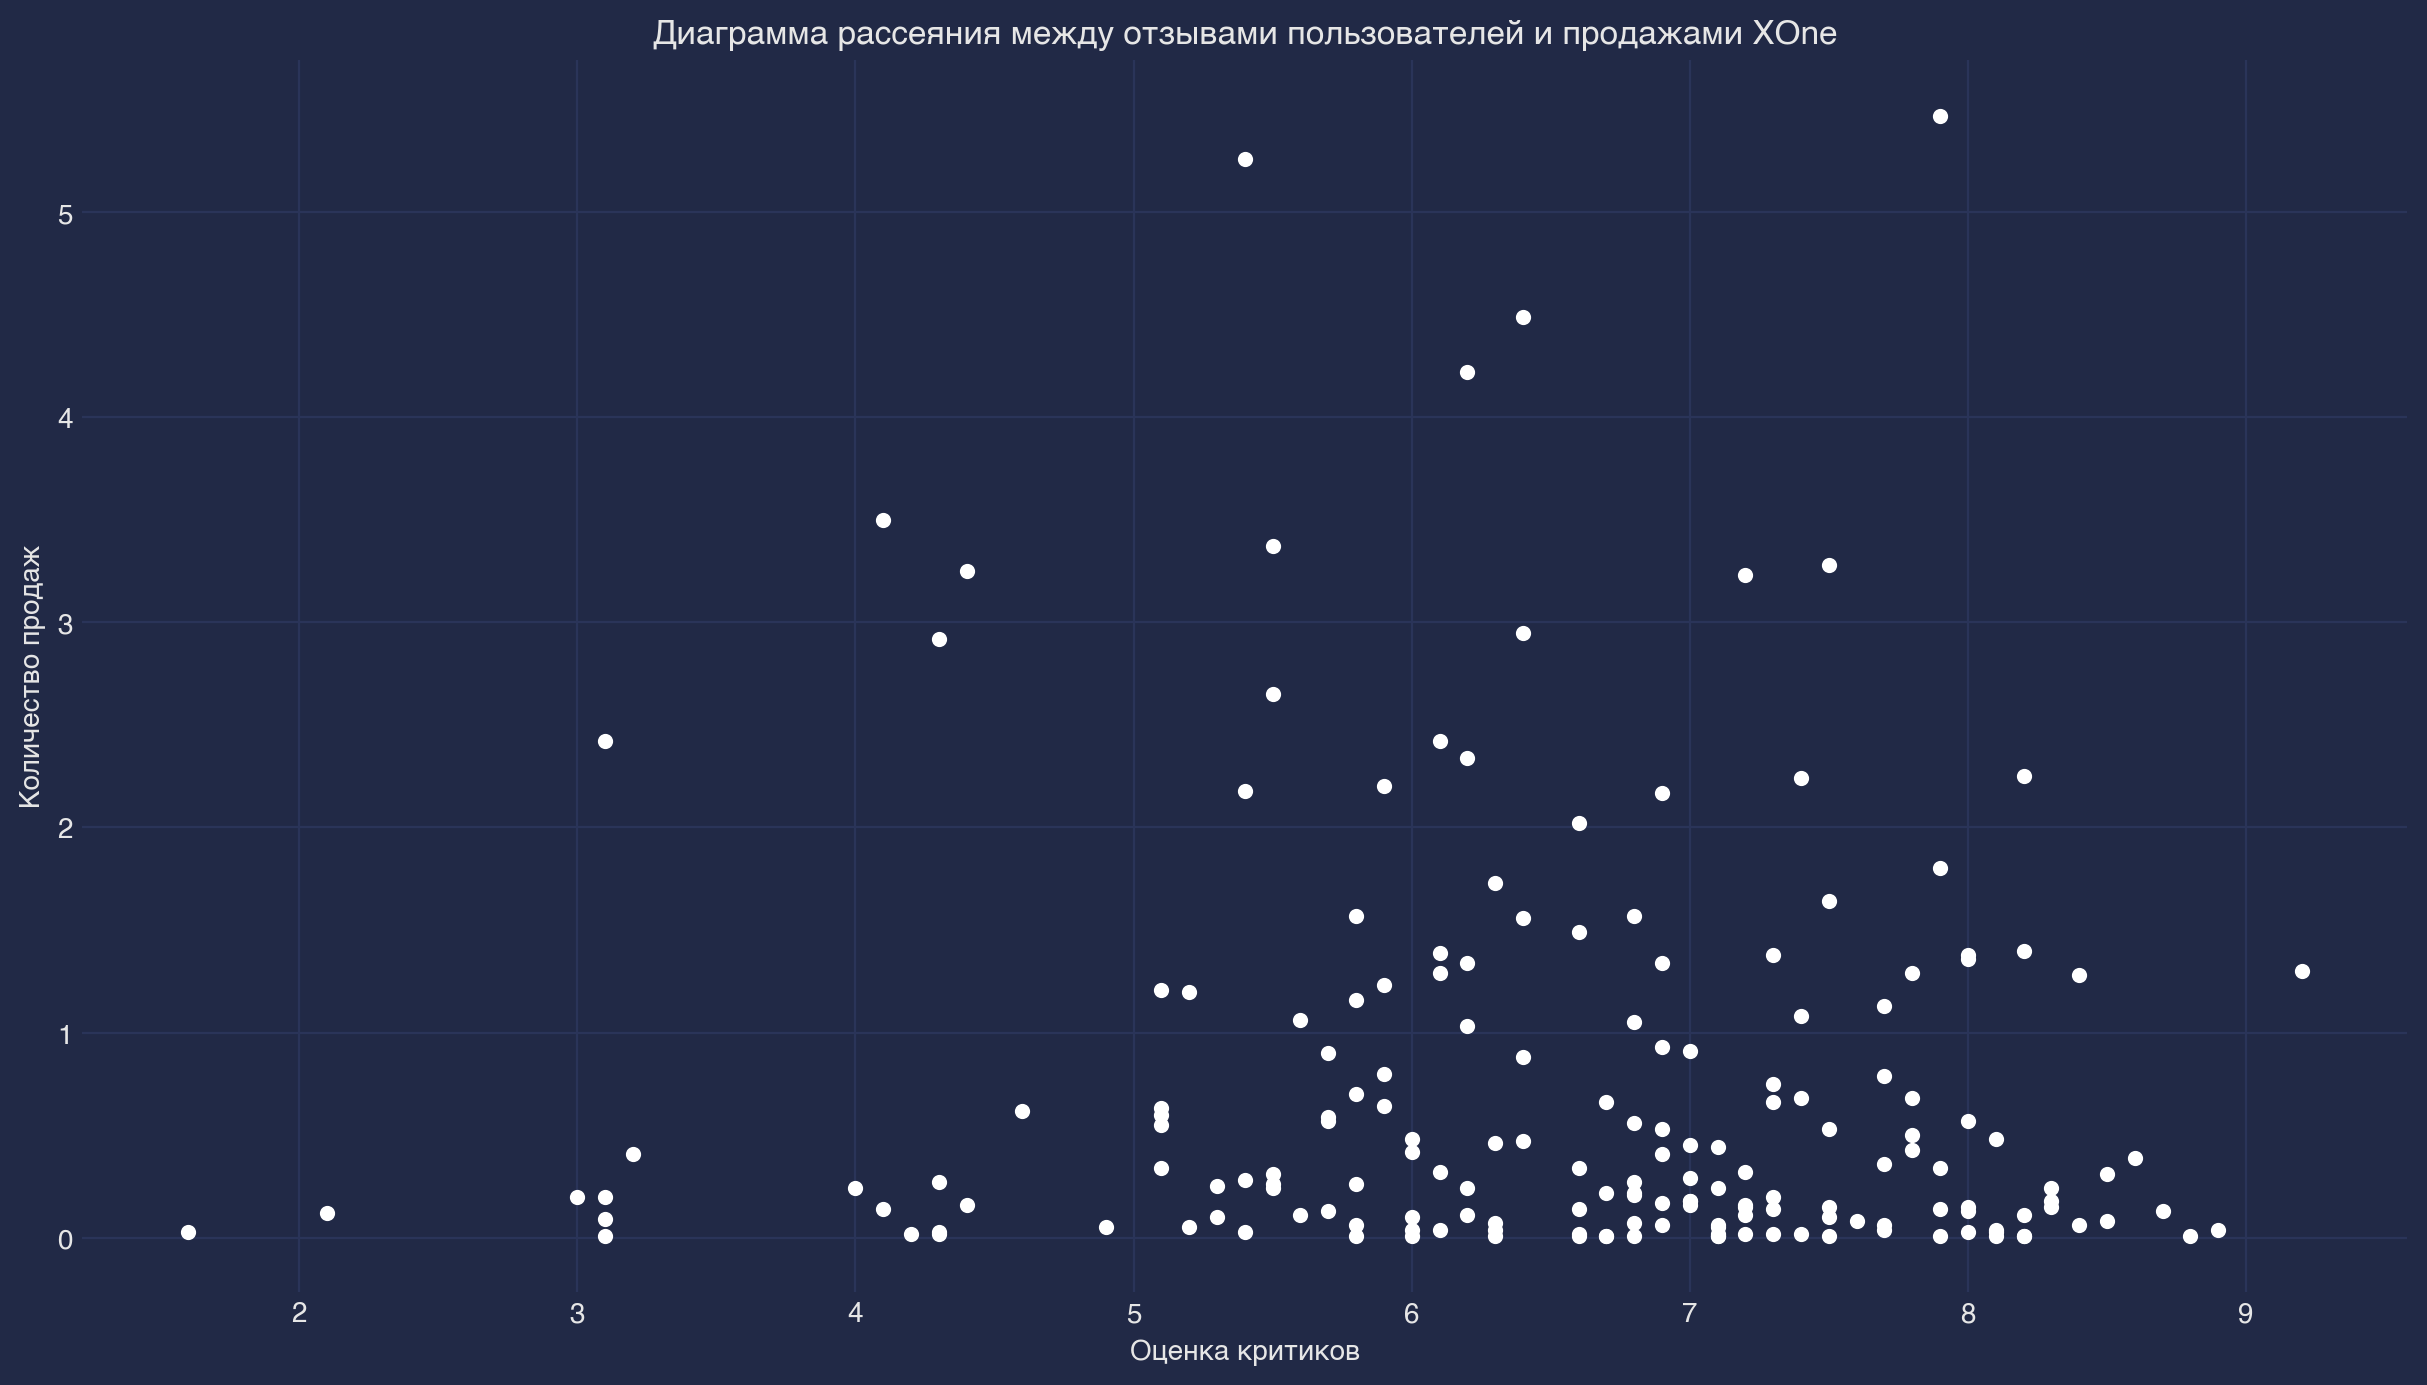

In [200]:
#строю диашрамму рассеяния
data_xone_corr.plot(kind='scatter', y='all_sales' , x='user_score', alpha=1, subplots=True, figsize=(15,8), c = 'w');
plt.xlabel('Оценка критиков')
plt.ylabel('Количество продаж')
plt.title('Диаграмма рассеяния между отзывами пользователей и продажами XOne');

### Шаг 4.8. Вывод: Коэфициент корреляции между количеством продаж и оценкой пользователей у самых популярных платформ почти равен нулю. Это означает, что зависимости между этими двумя параметрами нет

## Шаг 4.9. Сравнение коэффициентов корреляции между количеством продаж и оценкой пользователей

In [204]:
#строю таблицу по которой можно будет найти зависимость между оценкой пользователей и количеством продаж
data_corr = data[data['user_score']!=0]
data_corr['all_sales'].corr(data_corr['user_score'])

-0.0026078133545982688

### Шаг 4.9. Вывод: общий коэффициент корреляции между количеством продаж и оценкой пользователей и коэффициент корреляции между количеством продаж и оценкой критиков самых популярных платформ примерно схожы. Можно сделать вывод, что оценка пользователей не влияет на продоваемость игры.

In [207]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2233 entries, 16 to 16714
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   name                               2233 non-null   object 
 1   platform                           2233 non-null   object 
 2   year_of_release                    2233 non-null   Int64  
 3   genre                              2233 non-null   object 
 4   na_sales                           2233 non-null   float64
 5   eu_sales                           2233 non-null   float64
 6   jp_sales                           2233 non-null   float64
 7   other_sales                        2233 non-null   float64
 8   critic_score                       991 non-null    Int64  
 9   user_score                         2233 non-null   float64
 10  rating                             1256 non-null   object 
 11  all_sales                          2233 non-null   float64


## Шаг 4.10. Общее распределение игр по жанрам

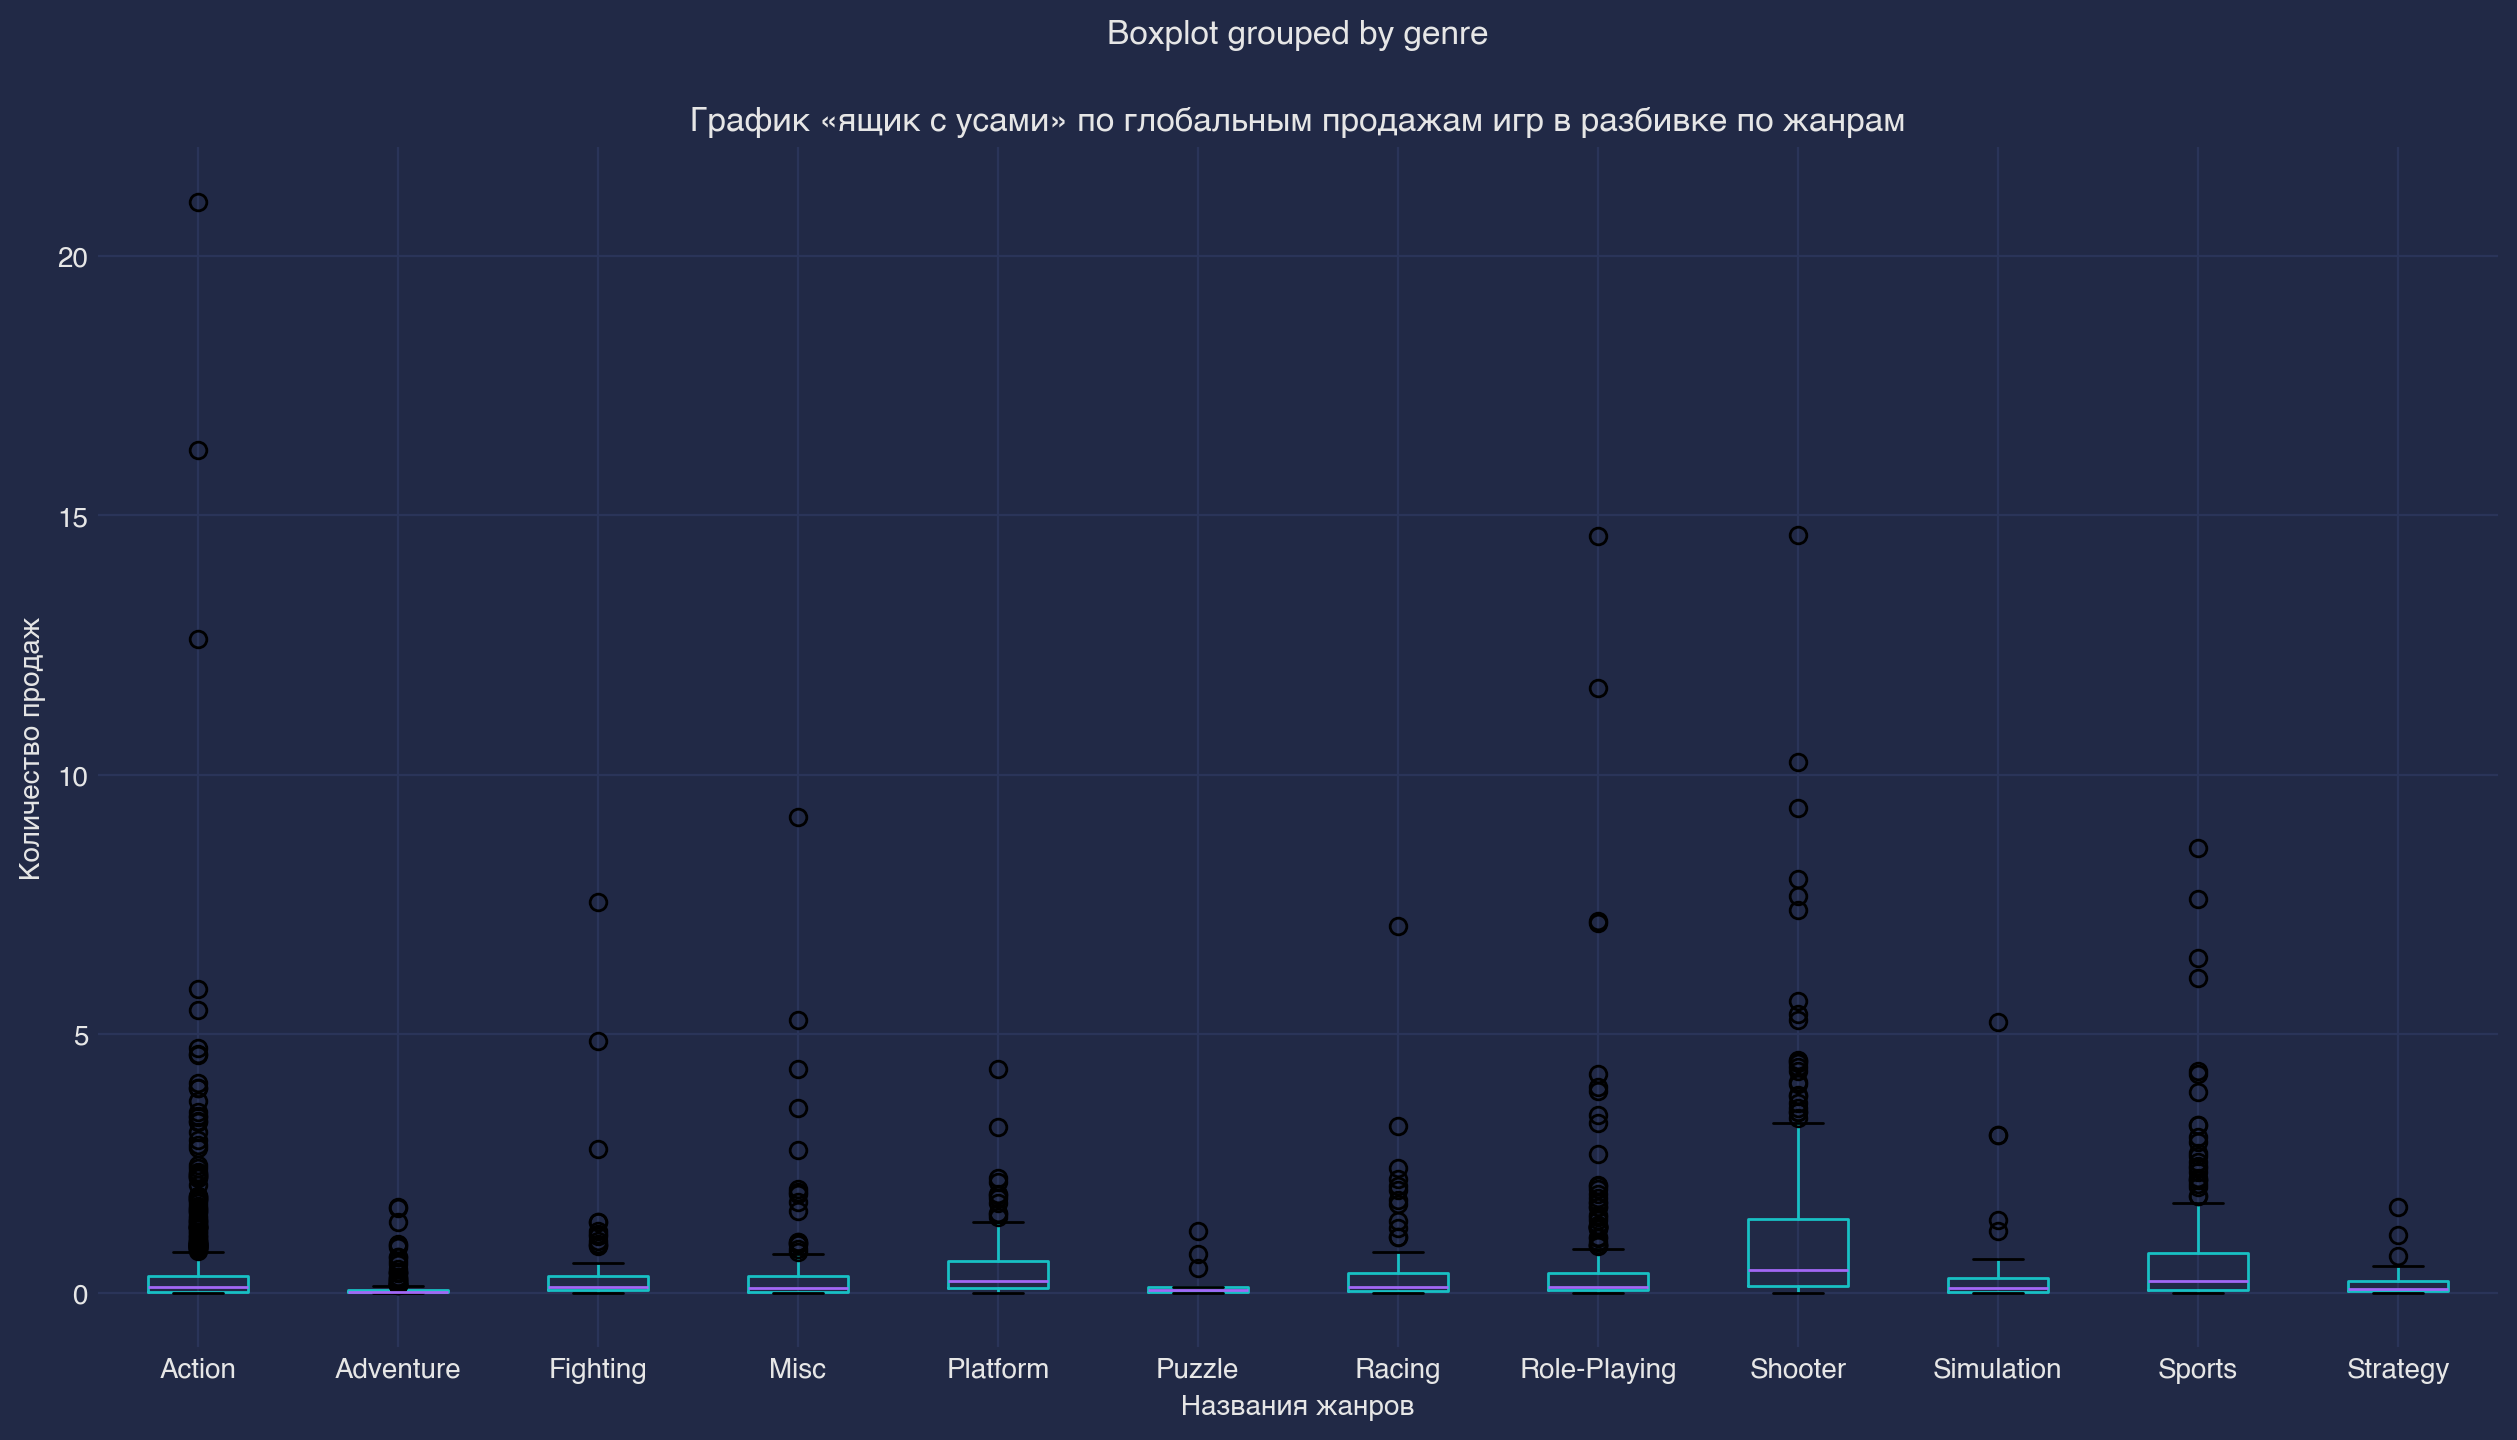

In [210]:
#создание графика «ящик с усами»
data.boxplot('all_sales', by='genre', figsize=(15, 8));
plt.xlabel('Названия жанров')
plt.ylabel('Количество продаж')
plt.title('График «ящик с усами» по глобальным продажам игр в разбивке по жанрам');

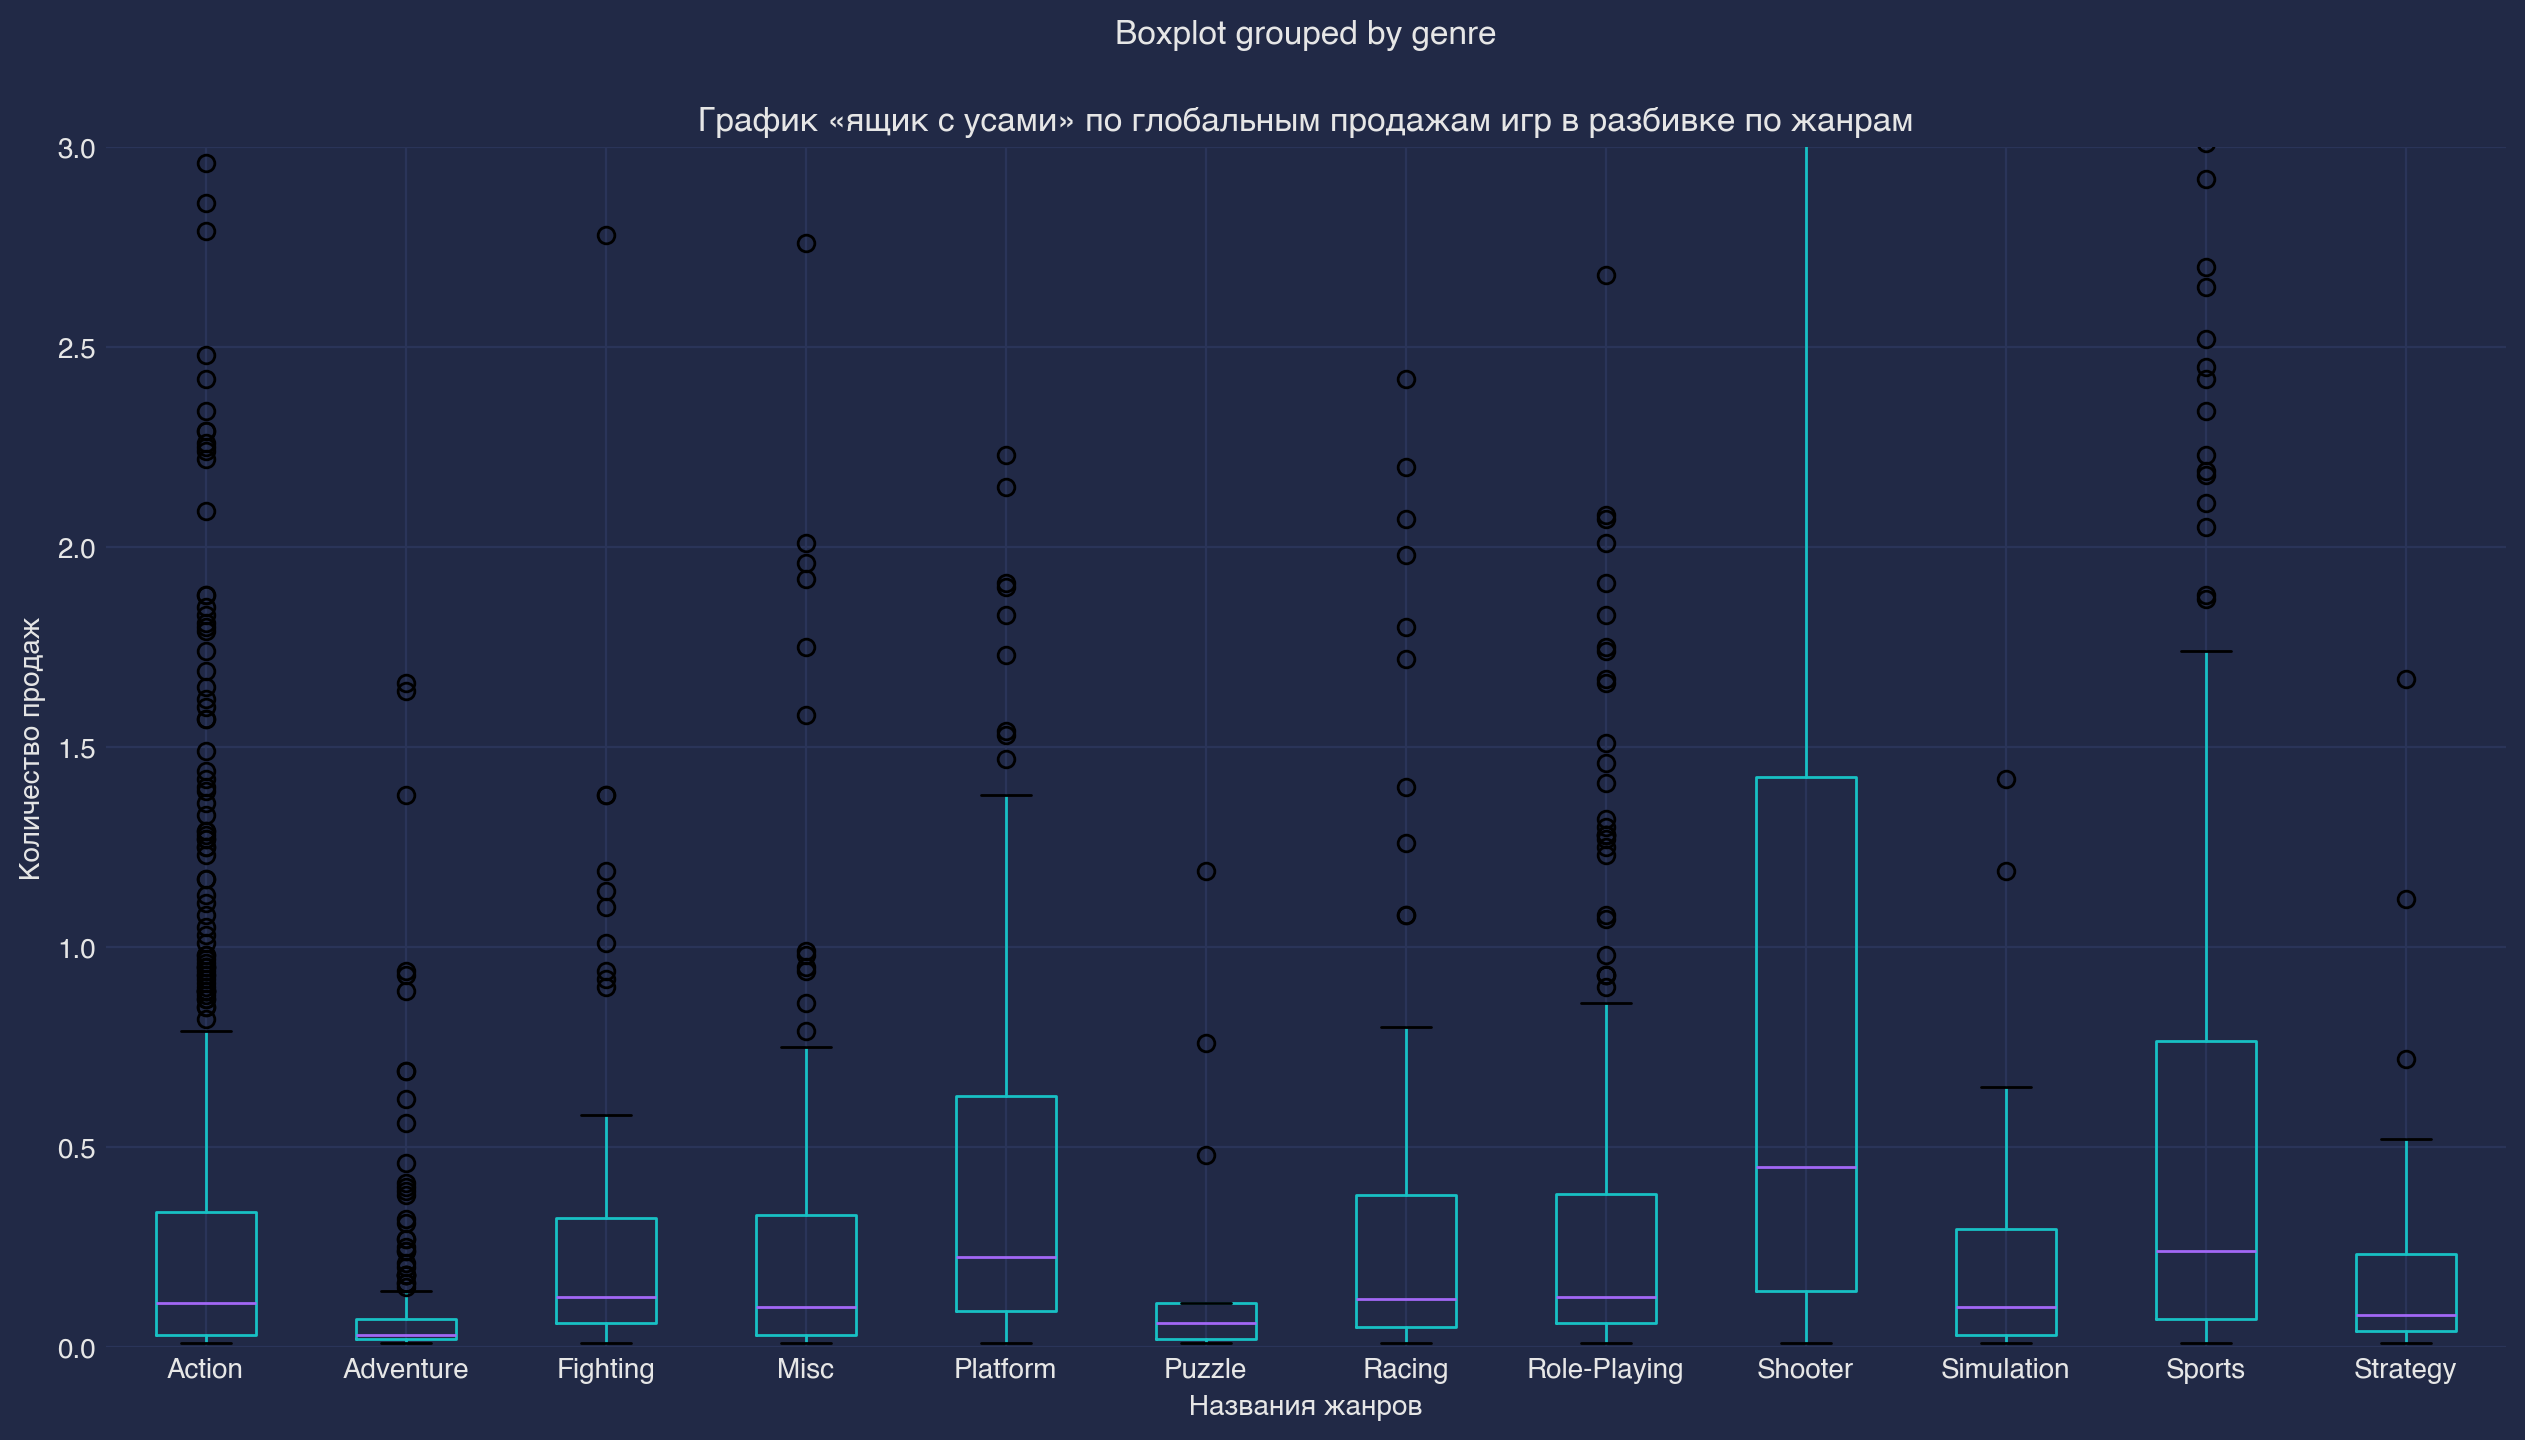

In [212]:
#создание графика «ящик с усами»
data.boxplot('all_sales', by='genre', figsize=(15, 8));
plt.xlabel('Названия жанров')
plt.ylabel('Количество продаж')
plt.title('График «ящик с усами» по глобальным продажам игр в разбивке по жанрам');
plt.ylim(0, 3);

### Шаг 4.9. Вывод: Больше всего продается жанр Action. Жанры с высокими и низкими продажами выделяются

# Шаг 5.  Составление портрета пользователя каждого региона

## Шаг 5.1. Самые популярные платформы для каждого региона

In [217]:
#создаю таблицу для удобного построения кругового графика
data_platformtop5_na = (
    data.pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .reset_index()
    
)
#создаю новую строку, в которую сохраню объем продаж платформ, которые не попали в топ 5
data_platformtop5_na.loc[len(data_platformtop5_na.index)] = ['Other', 0]
other = 0
other += data_platformtop5_na[data_platformtop5_na['na_sales']<30]['na_sales'].sum()
data_platformtop5_na.loc[data_platformtop5_na['platform']=='Other', 'na_sales'] = other
data_platformtop5_na = data_platformtop5_na[data_platformtop5_na['na_sales']>30]
#проверяю, что все получилось 
data_platformtop5_na

,platform,na_sales
0,PS4,108.74
1,XOne,93.12
2,X360,81.66
3,PS3,63.50
4,3DS,38.20
11,Other,52.49


In [219]:
#создаю таблицу для удобного построения кругового графика
data_platformtop5_eu = (
    data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .reset_index()
)
#создаю новую строку, в которую сохраню объем продаж платформ, которые не попали в топ 5
data_platformtop5_eu.loc[len(data_platformtop5_eu.index)] = ['Other', 0]
other = 0
other += data_platformtop5_eu[data_platformtop5_eu['eu_sales']<30]['eu_sales'].sum()
data_platformtop5_eu.loc[data_platformtop5_eu['platform']=='Other', 'eu_sales'] = other
data_platformtop5_eu = data_platformtop5_eu[data_platformtop5_eu['eu_sales']>30]
#проверяю, что все получилось 
data_platformtop5_eu

,platform,eu_sales
0,PS4,141.09
1,PS3,67.81
2,XOne,51.59
3,X360,42.52
4,3DS,30.96
11,Other,58.26


In [221]:
#создаю таблицу для удобного построения кругового графика
data_platformtop5_jp = (
    data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .reset_index()
)
#создаю новую строку, в которую сохраню объем продаж платформ, которые не попали в топ 5
data_platformtop5_jp.loc[len(data_platformtop5_jp.index)] = ['Other', 0]
other = 0
other += data_platformtop5_jp[data_platformtop5_jp['jp_sales']<4]['jp_sales'].sum()
data_platformtop5_jp.loc[data_platformtop5_jp['platform']=='Other', 'jp_sales'] = other
data_platformtop5_jp = data_platformtop5_jp[data_platformtop5_jp['jp_sales']>4]
#проверяю, что все получилось 
data_platformtop5_jp

,platform,jp_sales
0,3DS,67.81
1,PS3,23.35
2,PSV,18.59
3,PS4,15.96
4,WiiU,10.88
11,Other,4.19


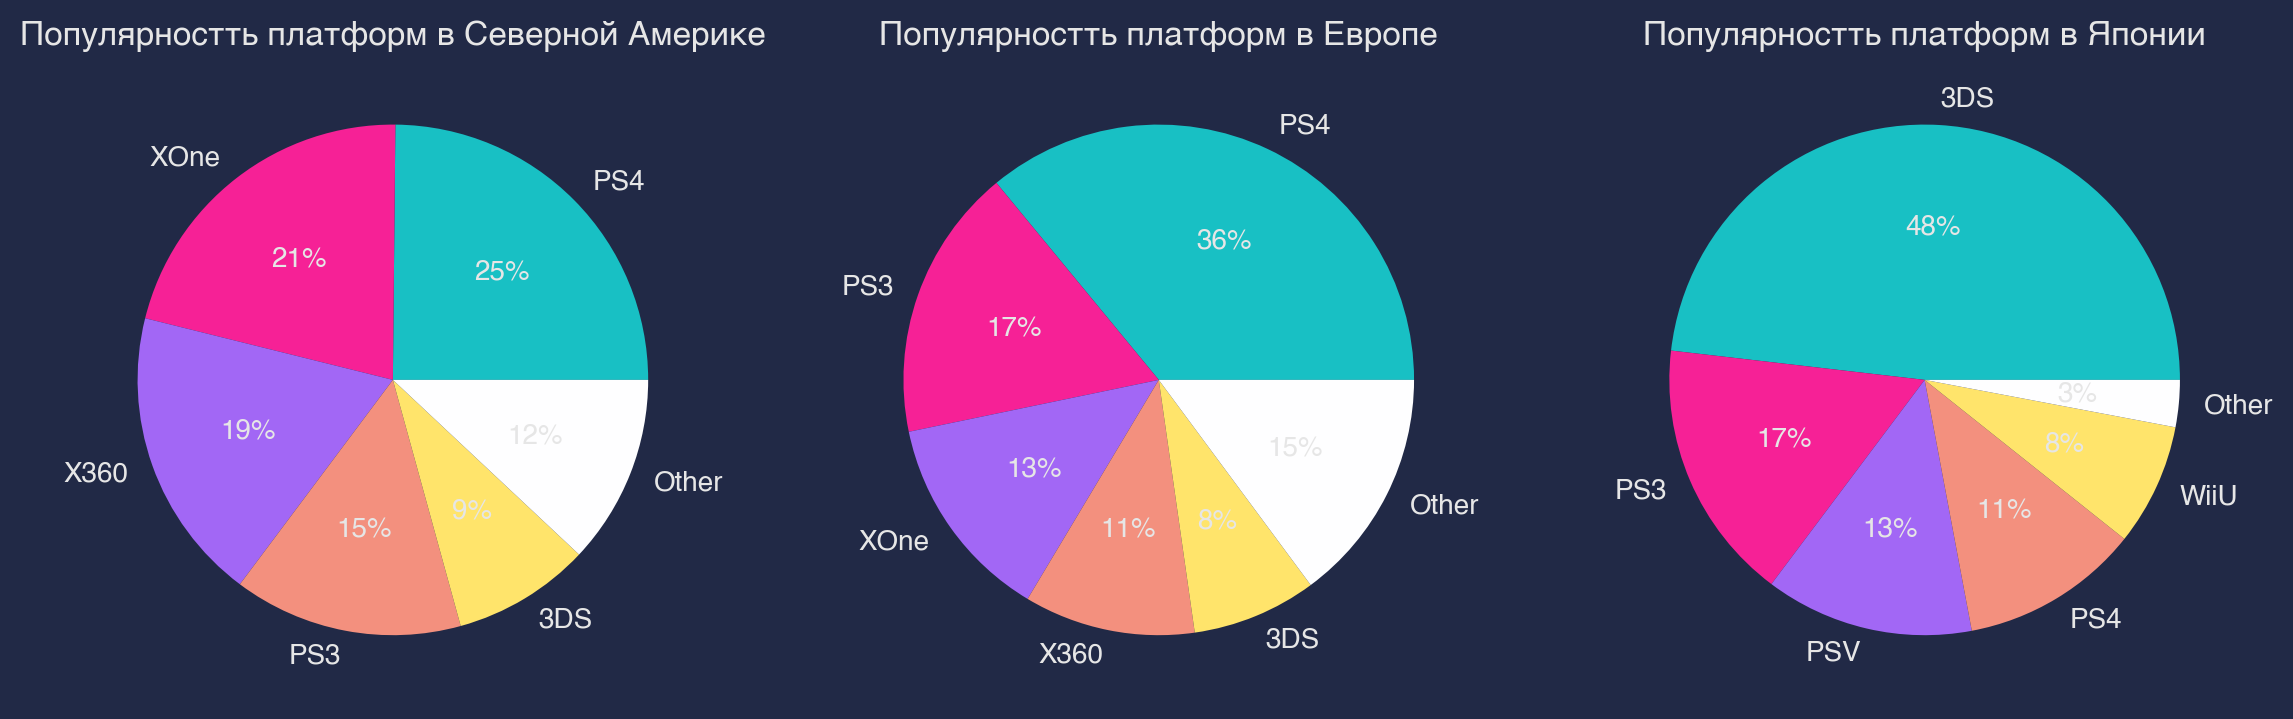

In [223]:
#стою три круговые диаграммы
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))

data_platformtop5_na.plot(kind='pie', y='na_sales', labels=data_platformtop5_na['platform'], legend=False,
                         autopct='%.0f%%', ax=ax1)
ax1.set_ylabel('')
ax1.set_title('Популярностть платформ в Северной Америке')
data_platformtop5_eu.plot(kind='pie', y='eu_sales', labels=data_platformtop5_eu['platform'], legend=False,
                         autopct='%.0f%%', ax=ax2)
ax2.set_ylabel('')
ax2.set_title('Популярностть платформ в Европе')
data_platformtop5_jp.plot(kind='pie', y='jp_sales', labels=data_platformtop5_jp['platform'], legend=False,
                         autopct='%.0f%%', ax=ax3)
ax3.set_ylabel('')
ax3.set_title('Популярностть платформ в Японии')
plt.show()

### Шаг 5.1. Вывод: Самая популярная платформа в Северное Америке - PS4, в Европе- PS4, а в Японии - 3DS

## Шаг 5.2. Самые популярные жанры для каждого региона

In [227]:
#создаю таблицу для удобного построения кругового графика
data_genretop5_na = (
    data.pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .reset_index()
    
)
#создаю новую строку, в которую сохраню объем продаж платформ, которые не попали в топ 5
data_genretop5_na.loc[len(data_genretop5_na.index)] = ['Other', 0]
other = 0
other += data_genretop5_na[data_genretop5_na['na_sales']<20]['na_sales'].sum()
data_genretop5_na.loc[data_genretop5_na['genre']=='Other', 'na_sales'] = other
data_genretop5_na = data_genretop5_na[data_genretop5_na['na_sales']>20]
#проверяю, что все получилось 
data_genretop5_na

,genre,na_sales
0,Action,126.05
1,Shooter,109.74
2,Sports,65.27
3,Role-Playing,46.40
4,Misc,27.49
12,Other,62.76


In [229]:
#создаю таблицу для удобного построения кругового графика
data_genretop5_eu = (
    data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .reset_index()
)
#создаю новую строку, в которую сохраню объем продаж платформ, которые не попали в топ 5
data_genretop5_eu.loc[len(data_genretop5_eu.index)] = ['Other', 0]
other = 0
other += data_genretop5_eu[data_genretop5_eu['eu_sales']<20.1]['eu_sales'].sum()
data_genretop5_eu.loc[data_genretop5_eu['genre']=='Other', 'eu_sales'] = other
data_genretop5_eu = data_genretop5_eu[data_genretop5_eu['eu_sales']>20.1]
#проверяю, что все получилось 
data_genretop5_eu

,genre,eu_sales
0,Action,118.13
1,Shooter,87.86
2,Sports,60.52
3,Role-Playing,36.97
4,Racing,20.19
12,Other,68.56


In [231]:
#создаю таблицу для удобного построения кругового графика
data_genretop5_jp = (
    data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .reset_index()
)
#создаю новую строку, в которую сохраню объем продаж платформ, которые не попали в топ 5
data_genretop5_jp.loc[len(data_genretop5_jp.index)] = ['Other', 0]
other = 0
other += data_genretop5_jp[data_genretop5_jp['jp_sales']<6]['jp_sales'].sum()
data_genretop5_jp.loc[data_genretop5_jp['genre']=='Other', 'jp_sales'] = other
data_genretop5_jp = data_genretop5_jp[data_genretop5_jp['jp_sales']>6]
#проверяю, что все получилось 
data_genretop5_jp

,genre,jp_sales
0,Role-Playing,51.04
1,Action,40.49
2,Misc,9.20
3,Fighting,7.65
4,Shooter,6.61
12,Other,25.79


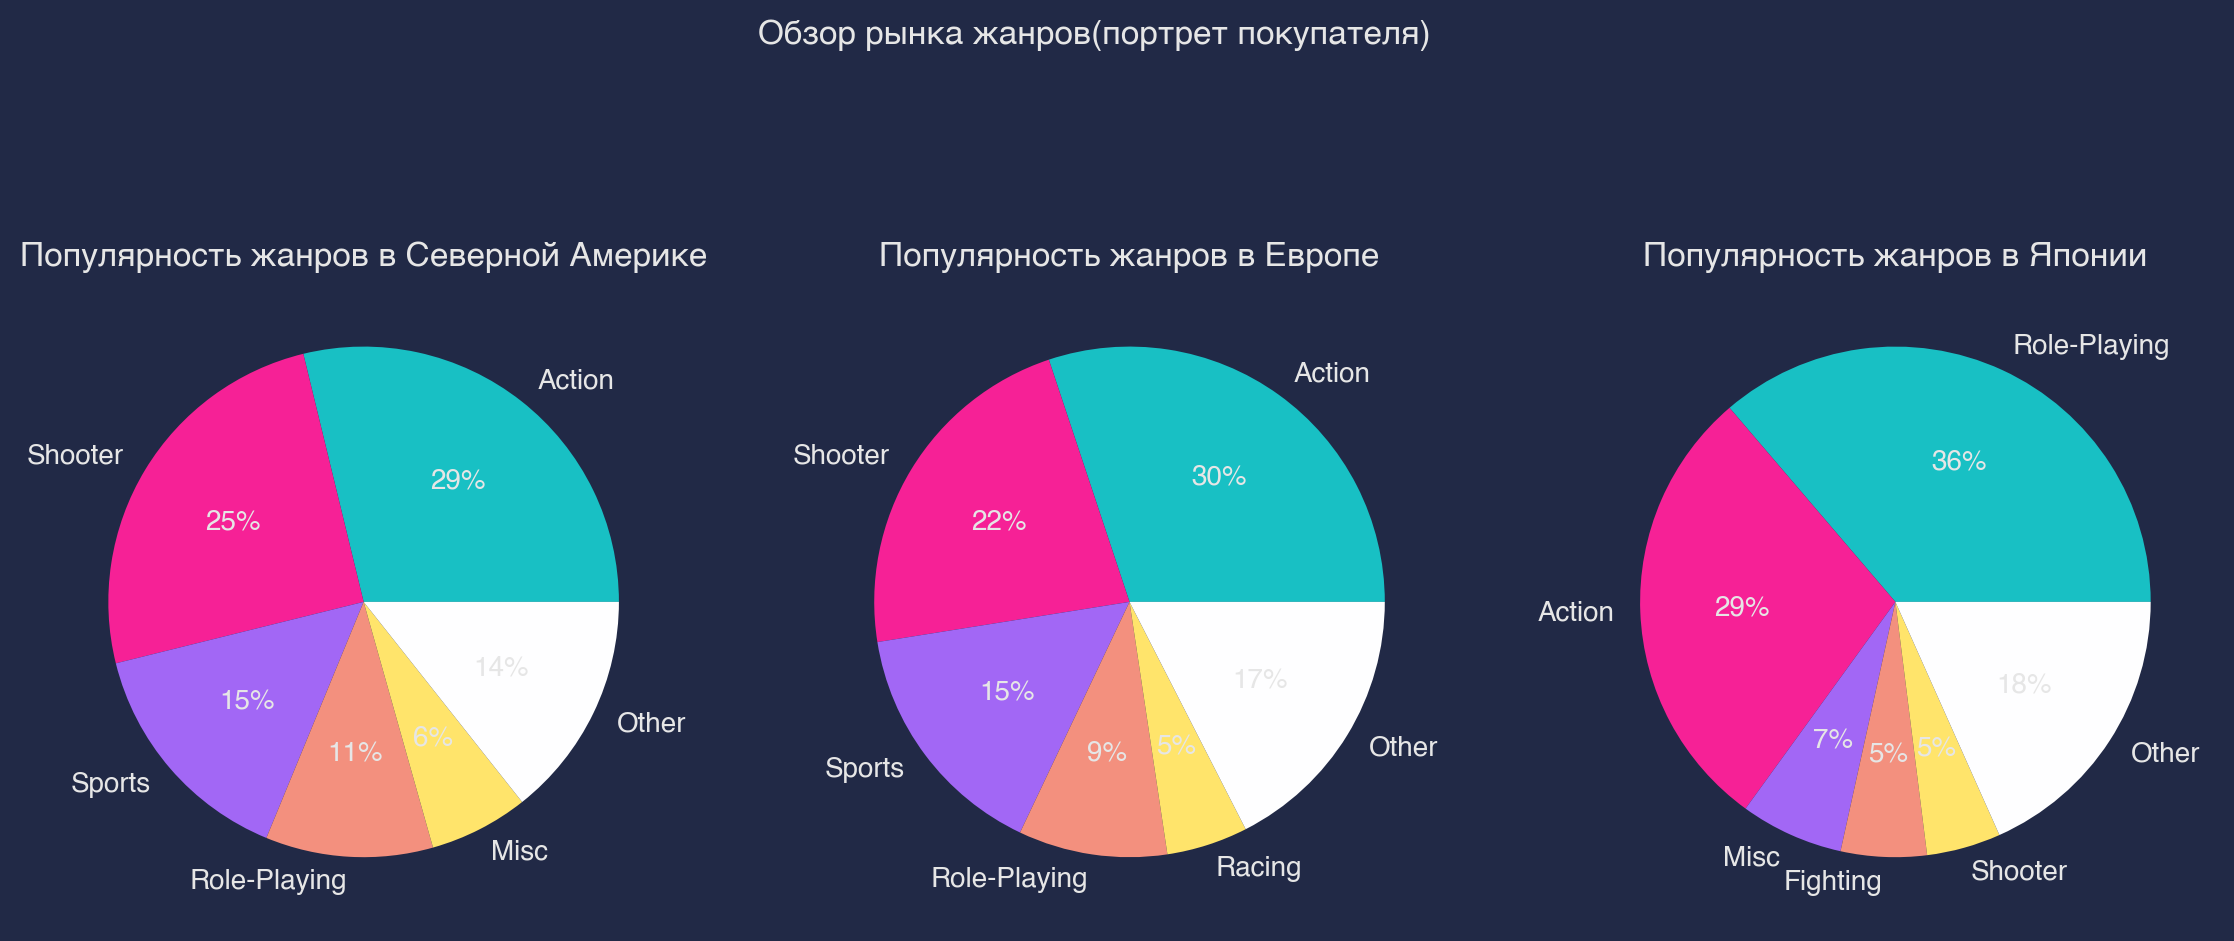

In [233]:
#стою три круговые диаграммы
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))
fig.suptitle('Обзор рынка жанров(портрет покупателя)')
data_genretop5_na.plot(kind='pie', y='na_sales', labels=data_genretop5_na['genre'], legend=False,
                         autopct='%.0f%%', ax=ax1)
ax1.set_ylabel('')
ax1.set_title('Популярность жанров в Северной Америке')
data_genretop5_eu.plot(kind='pie', y='eu_sales', labels=data_genretop5_eu['genre'], legend=False,
                         autopct='%.0f%%', ax=ax2)
ax2.set_ylabel('')
ax2.set_title('Популярность жанров в Европе')
data_genretop5_jp.plot(kind='pie', y='jp_sales', labels=data_genretop5_jp['genre'], legend=False,
                         autopct='%.0f%%', ax=ax3)
ax3.set_ylabel('')
ax3.set_title('Популярность жанров в Японии')
plt.show()

### Шаг 5.2. Вывод: Самый популярный жанр в Северной Америке - Action, в Европе - Action, а в Японии - Role-Playing

## Шаг 5.3. Влияет ли рейтинг ESRB на продажи в отдельном регионе

In [237]:
#создаю таблицу для удобного построения кругового графика
data_rating_na = (
    data.pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .reset_index()
)    
#проверяю, что все получилось 
data_rating_na

,rating,na_sales
0,M,165.21
1,E,79.05
2,E10+,54.24
3,T,49.79


In [239]:
#создаю таблицу для удобного построения кругового графика
data_rating_eu = (
    data.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .reset_index()
)    
#проверяю, что все получилось 
data_rating_eu

,rating,eu_sales
0,M,145.32
1,E,83.36
2,E10+,42.69
3,T,41.95


In [241]:
#создаю таблицу для удобного построения кругового графика
data_rating_jp = (
    data.pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .reset_index()
)    
#проверяю, что все получилось 
data_rating_jp

,rating,jp_sales
0,T,20.59
1,E,15.14
2,M,14.11
3,E10+,5.89


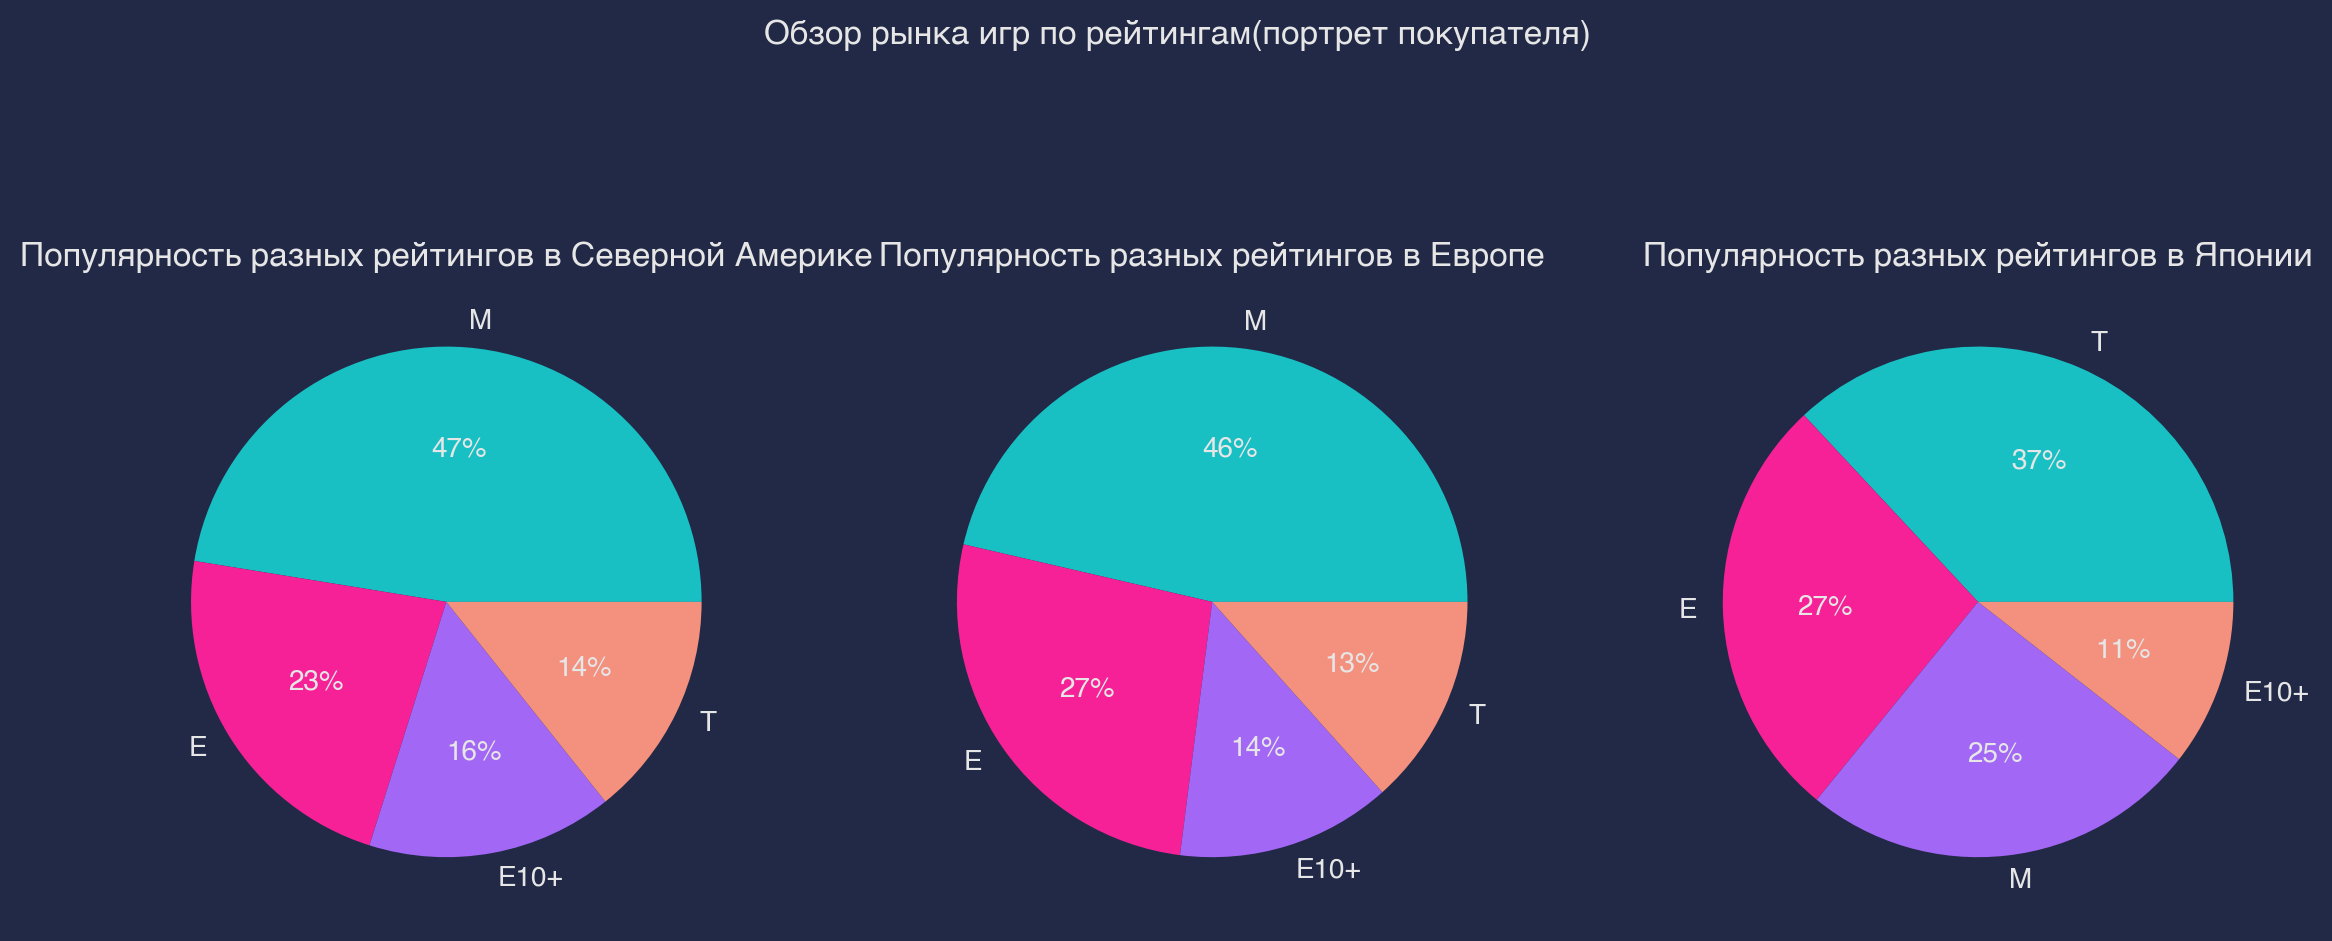

In [243]:
#стою три круговые диаграммы
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 6))
fig.suptitle('Обзор рынка игр по рейтингам(портрет покупателя)')
data_rating_na.plot(kind='pie', y='na_sales', labels=data_rating_na['rating'], legend=False,
                         autopct='%.0f%%', ax=ax1)
ax1.set_ylabel('')
ax1.set_title('Популярность разных рейтингов в Северной Америке')
data_rating_eu.plot(kind='pie', y='eu_sales', labels=data_rating_eu['rating'], legend=False,
                         autopct='%.0f%%', ax=ax2)
ax2.set_ylabel('')
ax2.set_title('Популярность разных рейтингов в Европе')
data_rating_jp.plot(kind='pie', y='jp_sales', labels=data_rating_jp['rating'], legend=False,
                         autopct='%.0f%%', ax=ax3)
ax3.set_ylabel('')
ax3.set_title('Популярность разных рейтингов в Японии')
plt.show()

### Шаг 5.3. Вывод: Япония очень сильно отличается от других регионов.  Распеделение продаж по рейтингам у нее совсем другое

# Шаг 6. Проверка гипотез

## Шаг 6.1. Проверка первой гипотезы

In [248]:
#создаю новый датафрейм, в котором все рейтинги пользователей положительны и не равны нулю
data_4 = data.loc[data['user_score']>0]

**Нулевая гиптеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC разные.**

In [251]:
# провожу т-тест, где альтернативная гипотеза двухсторонняя 
alpha = 0.05
result = st.ttest_ind(data_4[data_4['platform']=='XOne']['user_score'], data_4[data_4['platform']=='PC']['user_score'], 
                      alternative='two-sided')
display(f'p-value: {result.pvalue}')
if result.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Нет оснований отвергнуть нулевую гипотезу')

'p-value: 0.14012658403611647'

'Нет оснований отвергнуть нулевую гипотезу'

**Полученное значение p-value говорит о том, что хотя средние рейтинги платформ XOne и PC неодинаковы, <b> но с вероятностью в 14% такое или большее различие можно получить случайно. </b>Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингаи платформ XOne и PC.**

###  Шаг 6.1. Вывод: на основе проведенного т-теста нулевую гипотезу отвергнуть нельзя

## Шаг 6.2. Проверка второй гипотезы

**Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports одинаковые. Альтенативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports разные**

In [259]:
# провожу т-тест, где альтернативная гипотеза двухсторонняя 
alpha = 0.05
result = st.ttest_ind(data_4[data_4['genre']=='Action']['user_score'], data_4[data_4['genre']=='Sports']['user_score'], 
                      alternative='two-sided')
display(f'p-value: {result.pvalue}')
if result.pvalue < alpha:
    display('Отвергаем нулевую гипотезу')
else:
    display('Нет оснований отвергнуть нулевую гипотезу')

'p-value: 1.0517832389140023e-27'

'Отвергаем нулевую гипотезу'

###  Шаг 6.2. Вывод: на основе проведенного т-теста нулевую гипотезу можно смело отвергнуть

# Шаг 7. Основной вывод: Все данные 'почищены ', все пропуски которые можно было заменить, заменены. Убраны все дубликаты. Все названия столбцов приведены к нижнему регистеру

# Определен средний срок жизни каждой платформы он равен 12 годам. Больше всего игр выпускалась на такие платформы как - PS4, 3DS и XOne. Было определенно, что отзывы критиков влияют на продажи игр, в отличии от отзывов пользователей, которые вообще никак не влият на продаваемость игр. Самые популярные жанры это - Role-Playing, Action и Shooter.

# В Северной Америке самая популярная платформа это PS4, а самый популярный жанр это Action. В Европе самая популярная платформа это -PS4, а самый популярный жанр это - Action. В Японии самая популярная платформа это 3DS, а самый популярный жанр это - Role-Playing